In [2]:
import uproot
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import math 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel

In [4]:
num_round_polm80=400
num_round_polp80=400
num_plot_polm80_min=0
num_plot_polm80_max=0
num_plot_polp80_min=0
num_plot_polp80_max=0

In [5]:
#H1_mass_array= tree_polm80_hhz_signal.array("comb_jet1_mass")
file_polm80_hhz_signal=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14364.root")
file_polm80_hzqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hzqq_13391.root")
file_polm80_ee_qq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qq_13399_to_13402.root")
file_polm80_ee_qqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqq_13394_to_13397.root")
file_polm80_ee_qqqqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqqqq.root")
file_polm80_WWH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_WWH_qqqqH_14734.root")
file_polm80_ZZH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ZZH_qqqqH_14726.root")


tree_polm80_hhz_signal = file_polm80_hhz_signal["MVATrainingVariables"]
tree_polm80_hhz_signal.keys()
tree_polm80_hzqq_BG = file_polm80_hzqq_BG["MVATrainingVariables"]
tree_polm80_hzqq_BG = file_polm80_hzqq_BG["MVATrainingVariables"]
tree_polm80_ee_qq_BG = file_polm80_ee_qq_BG["MVATrainingVariables"]
tree_polm80_ee_qqqq_BG = file_polm80_ee_qqqq_BG["MVATrainingVariables"]
tree_polm80_ee_qqqqqq_BG = file_polm80_ee_qqqqqq_BG["MVATrainingVariables"]
tree_polm80_WWH_qqqqH_BG = file_polm80_WWH_qqqqH_BG["MVATrainingVariables"]
tree_polm80_ZZH_qqqqH_BG = file_polm80_ZZH_qqqqH_BG["MVATrainingVariables"]
#H1_mass_array= tree_polm80_hhz_signal.array("comb_jet1_mass")
#feature: jet6_theta, importance: 0.006951884366571903
#feature: jet4_theta, importance: 0.0081394137814641
#feature: jet5_theta, importance: 0.008377623744308949
#feature: jet4_E, importance: 0.008673656731843948
#feature: comb_jet2_BTagMax, importance: 0.008875861763954163
#feature: jet3_E, importance: 0.009489532560110092

#feature: jet6_theta, importance: 0.007176658604294062
#feature: jet4_E, importance: 0.007868878543376923
#feature: jet5_theta, importance: 0.00789350364357233
#feature: jet4_theta, importance: 0.00875063892453909
#feature: comb_jet3_BTagMax, importance: 0.009214065968990326
#feature: comb_jet2_BTagMax, importance: 0.009325340390205383


df_polm80_HHZ=tree_polm80_hhz_signal.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
#df_polm80_HHZ=df_polm80_HHZ.drop(['jet6_theta', 'jet6_E','jet4_theta','jet4_E','jet3_E'], axis=1)
df_polm80_HHZ[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[1,0,0,0,0,0,0]], index=df_polm80_HHZ.index)
df_polm80_HHZ.to_csv("dataframe_polm80_SIG.csv")
df_polm80_BG=tree_polm80_hzqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
#drop less important features <1 % and check
df_polm80_BG[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,1,0,0,0,0,0]], index=df_polm80_BG.index)
df_polm80_ee_qq=tree_polm80_ee_qq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ee_qq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,1,0,0,0,0]], index=df_polm80_ee_qq.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ee_qq,ignore_index=True)
df_polm80_ee_qqqq=tree_polm80_ee_qqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ee_qqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,1,0,0,0]], index=df_polm80_ee_qqqq.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ee_qqqq,ignore_index=True)
df_polm80_ee_qqqqqq=tree_polm80_ee_qqqqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ee_qqqqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,1,0,0]], index=df_polm80_ee_qqqqqq.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ee_qqqqqq,ignore_index=True)
df_polm80_WWH_qqqqH=tree_polm80_WWH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_WWH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,1,0]], index=df_polm80_WWH_qqqqH.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_WWH_qqqqH,ignore_index=True)
df_polm80_ZZH_qqqqH=tree_polm80_ZZH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ZZH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,0,1]], index=df_polm80_ZZH_qqqqH.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ZZH_qqqqH,ignore_index=True)
#df_polm80_BG=df_polm80_BG.drop(['jet6_theta', 'jet6_E','jet4_theta','jet4_E','jet3_E'], axis=1)
#polm80 after loop best result now for thresh 0 1.9231107313597056 7.1626043831929564 6.709212450077757
#using ALL the variables
#Sig, BG, sum, metric 4.672464674082233 9.709791960194707 14.489369597285986 24.199161557480693 1.973830090641824 1.9844308321733362
#but also that
#polm80 after loop best result now for thresh 0 2.0675560241257993 4.746041810140014 0.5232050677295774



#drop weight column here
Y_polm80_HHZ=np.ones((df_polm80_HHZ.shape[0],1))
#print("shape of data frame BG after",df_polm80_BG.shape,df_polm80_BG.tail())
Y_polm80_BG=np.zeros((df_polm80_BG.shape[0],1))
#print ("polm80 shape of Ysig, back",Y_polm80_HHZ.shape,Y_polm80_BG.shape)
df_polm80_HHZ.head()
df_polm80_total=df_polm80_HHZ.append(df_polm80_BG,ignore_index=True)



y_polm80_total=np.append(Y_polm80_HHZ,Y_polm80_BG)
X_polm80_total=np.asarray(df_polm80_total)
test_size_polm80=0.3
X_polm80_train, X_polm80_test, y_polm80_train, y_polm80_test = train_test_split(df_polm80_total, y_polm80_total, test_size=test_size_polm80)
print("polm80 shape of X_train/X_test/y_train/y_test",X_polm80_train.shape, X_polm80_test.shape, y_polm80_train.shape, y_polm80_test.shape)

sel_HHZ_polm80_train=X_polm80_train['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polm80_train=X_polm80_train['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polm80_train=X_polm80_train['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polm80_train=X_polm80_train['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polm80_train=X_polm80_train['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polm80_train=X_polm80_train['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polm80_train=X_polm80_train['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_HHZ_polm80_test=X_polm80_test['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polm80_test=X_polm80_test['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polm80_test=X_polm80_test['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polm80_test=X_polm80_test['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polm80_test=X_polm80_test['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polm80_test=X_polm80_test['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polm80_test=X_polm80_test['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)

#last 7 columns should be all labelling of the different samples, so take it out to define the matrix
data_polm80_train=X_polm80_train.iloc[:,1:-7]

weight_polm80_train = X_polm80_train.iloc[:,0]
weight_polm80_test = X_polm80_test.iloc[:,0]
weight_polm80_array_test=np.asarray(weight_polm80_test)
weight_polm80_array_train=np.asarray(weight_polm80_train)

weights_polm80_test_B=np.ma.masked_where(y_polm80_test==1,weight_polm80_array_test)
weights_polm80_test_S=np.ma.masked_where(y_polm80_test==0,weight_polm80_array_test)
#print("test all weights",np.sum(weight_polm80_array_test),np.sum(weights_polm80_test_B),np.sum(weights_polm80_test_S))

sum_wpos_train_polm80 = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_train_polm80 = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)
sum_tot_hhz_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_HHZ_polm80_train[i]==1)
sum_tot_hzqq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_hzqq_polm80_train[i]==1)
sum_tot_ee_qq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ee_qq_polm80_train[i]==1)
sum_tot_ee_qqqq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ee_qqqq_polm80_train[i]==1)
sum_tot_ee_qqqqqq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ee_qqqqqq_polm80_train[i]==1)
sum_tot_WWH_qqqqH_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_WWH_qqqqH_polm80_train[i]==1)
sum_tot_ZZH_qqqqH_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ZZH_qqqqH_polm80_train[i]==1)

sum_tot_hhz_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_HHZ_polm80_test[i]==1)
sum_tot_hzqq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_hzqq_polm80_test[i]==1)
sum_tot_ee_qq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ee_qq_polm80_test[i]==1)
sum_tot_ee_qqqq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ee_qqqq_polm80_test[i]==1)
sum_tot_ee_qqqqqq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ee_qqqqqq_polm80_test[i]==1)
sum_tot_WWH_qqqqH_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_WWH_qqqqH_polm80_test[i]==1)
sum_tot_ZZH_qqqqH_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ZZH_qqqqH_polm80_test[i]==1)


sum_wpos_test_polm80 = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_test_polm80 = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_train_polm80/sum_wneg_train_polm80 
recale_polm80_test_SIG=sum_wpos_train_polm80/sum_wpos_test_polm80
recale_polm80_test_BG=sum_wpos_train_polm80/sum_wneg_test_polm80

scale_pos_weight_train_polm80 = sum_wneg_train_polm80/sum_wpos_train_polm80
data_polm80_test=X_polm80_test.iloc[:,1:-7]

polm80 shape of X_train/X_test/y_train/y_test (72559, 41) (31097, 41) (72559,) (31097,)


In [ ]:
xgmat_polm80_train = xgb.DMatrix( data_polm80_train, label=y_polm80_train, missing = -999.0, weight=weight_polm80_train )
xgmat_polm80_test = xgb.DMatrix( data_polm80_test, missing = -999.0, weight=weight_polm80_test )
watchlist_polm80 = [(xgmat_polm80_train, 'train'), (xgmat_polm80_test , 'validation')]
#param_polm80 = {'seed': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 'eta': 0.05, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polm80, 'eval_metric': ['error','auc'],'evals': watchlist_polm80, 'early_stopping_round': 10,
#                'gamma': 0, 'min_child_weight': 1,'lambda': 1, 'alpha': 0,'tree_method':'exact','subsample':1,
#                'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1}
param_polm80 = {'seed': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 4, 'eta': 0.01, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polm80, 'eval_metric': ['error','auc'],'evals': watchlist_polm80, 'early_stopping_round': 10,
               'gamma': 0.0, 'min_child_weight': 1.0,'lambda': 1, 'alpha': 0,'tree_method':'exact','subsample':1,
                'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1}
#    parameters = {
#        'num_boost_round': [100, 250, 500],
#        'eta': [0.05, 0.1, 0.3],
#        'max_depth': [6, 9, 12],
#        'subsample': [0.9, 1.0],
#        'colsample_bytree': [0.9, 1.0],
#    }
#    clf = GridSearchCV(clf, parameters, n_jobs=1, cv=2)



print("before training polm80")
XGB_Model_polm80 =xgb.train(param_polm80,xgmat_polm80_train,num_boost_round=num_round_polm80,verbose_eval=True)
print("after training polm80")

In [ ]:
XGB_Model_polm80.save_model("/Users/matthiasweber/jupytermacros/HHZModel_polm80.model")
modelfile_polm80 = '/Users/matthiasweber/jupytermacros/HHZModel_polm80.model'
print('model saved')
cross_val_polm80 = xgb.cv(param_polm80,xgmat_polm80_train, num_boost_round=num_round_polm80, nfold=10, early_stopping_rounds=10, metrics=['error','auc'], verbose_eval=True)

if XGB_Model_polm80.best_ntree_limit != num_round_polm80 :
    print("after training polpm0 found cutoff",XGB_Model_polm80.best_score,XGB_Model_polm80.best_ntree_limit,XGB_Model_polm80.best_iteration)
else:
    print("after training polm80",XGB_Model_polm80.best_ntree_limit,XGB_Model_polm80.best_iteration)

In [14]:
XGB_Model_polm80_sklearn =xgb.XGBClassifier()
param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':0.8,'max_delta_step':0,'max_depth': 5, 
                    'learning_rate': 0.01, 'objective': 'binary:logitraw','n_jobs':4, 
                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
                    'gamma': 0.0, 'min_child_weight': 1.0,'reg_lambda': 1.0, 'reg_alpha': 0.0,'tree_method':'exact',
                    'importance_type': "gain",'verbosity': 2,
                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
                    'n_estimators': num_round_polm80}
#param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 9, 
#                    'learning_rate': 0.01, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
#                    'gamma': 0.3, 'min_child_weight': 5.5,'reg_lambda': 5.0, 'reg_alpha': 0,'tree_method':'exact',
#                   'subsample':0.8,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polm80}
XGB_Model_polm80_sklearn.set_params(**param_polm80_skl)
#XGB_Model_polm80_sklearn.set_params(random_state=7,tree_method="exact",max_delta_step=0,n_estimators =num_round_polm80, scale_pos_weight=scale_pos_weight_train_polm80, max_depth=6, learning_rate=0.05, objective='binary:logitraw',n_jobs=4, verbosity=2,importance_type="gain",
#                                            gamma= 0, min_child_weight=1,reg_lambda= 1,reg_alpha=0,base_score=0.5,
#                                    subsample=1,colsample_bytree=1,colsample_bylevel=1,colsample_bynode=1.0)
print("before fittin sklearn polm80")
#XGB_Model_polm80_sklearnfit=XGB_Model_polm80_sklearn.fit(X=data_polm80_train, y=y_polm80_train, sample_weight=weight_polm80_train, early_stopping_rounds=10)
XGB_Model_polm80_sklearnfit=XGB_Model_polm80_sklearn.fit(X=data_polm80_train, y=y_polm80_train, sample_weight=weight_polm80_train, sample_weight_eval_set=[weight_polm80_train,weight_polm80_test],eval_metric= ['error','auc'],eval_set=[(data_polm80_train,y_polm80_train),(data_polm80_test,y_polm80_test)], early_stopping_rounds=10)
print("after fitting sklearn polm80",XGB_Model_polm80_sklearnfit.best_score,XGB_Model_polm80_sklearnfit.best_ntree_limit,XGB_Model_polm80_sklearnfit.best_iteration)
#evals_result_polm80_sklearn = XGB_Model_polm80_sklearn.evals_result()
XGB_Model_polm80_sklearn_le = LabelEncoder().fit(y_polm80_test)
#ypred_polm80_test_skl_1 = XGB_Model_polm80_sklearn.predict(data_polm80_test)
modelfile_polm80_sklearn="/Users/matthiasweber/jupytermacros/HHZModel_polm80_skl_BTag3_2_20.model"
XGB_Model_polm80_sklearn.save_model(modelfile_polm80_sklearn)
#print("eval results",evals_result_polm80_sklearn)
#print("feature importance",XGB_Model_polm80_sklearn.feature_importances_)

before fittin sklearn polm80
[13:20:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[0]	validation_0-error:0.001949	validation_0-auc:0.872626	validation_1-error:0.001948	validation_1-auc:0.855162
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[13:20:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-error:0.001949	validation_0-auc:0.882042	validation_1-error:0.001948	validation_1-auc:0.865864
[13:20:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-error:0.001949	validation_0-auc:0.884817	validation_1-error:0.001948	validation_1-auc:0.868021
[13:20:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[3]	va

[13:20:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[35]	validation_0-error:0.008726	validation_0-auc:0.902729	validation_1-error:0.00916	validation_1-auc:0.884611
[13:20:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[36]	validation_0-error:0.009594	validation_0-auc:0.903069	validation_1-error:0.009604	validation_1-auc:0.884961
[13:20:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[37]	validation_0-error:0.010004	validation_0-auc:0.903191	validation_1-error:0.010232	validation_1-auc:0.885169
[13:20:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[38]	validation_0-error:0.011169	validation_0-auc:0.90362	validation_1-error:0.011558	validation_1-auc:0.885688
[13:21:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 e

[70]	validation_0-error:0.040444	validation_0-auc:0.910098	validation_1-error:0.046857	validation_1-auc:0.891904
[13:21:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[71]	validation_0-error:0.040964	validation_0-auc:0.910305	validation_1-error:0.047717	validation_1-auc:0.892007
[13:21:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[72]	validation_0-error:0.042173	validation_0-auc:0.910562	validation_1-error:0.048533	validation_1-auc:0.892224
[13:21:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[73]	validation_0-error:0.042669	validation_0-auc:0.910799	validation_1-error:0.048795	validation_1-auc:0.892396
[13:21:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[74]	validation_0-error:0.043206	validation_0-auc:0.910921	validation_1-erro

[106]	validation_0-error:0.053232	validation_0-auc:0.917525	validation_1-error:0.060598	validation_1-auc:0.898938
[13:22:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[107]	validation_0-error:0.053482	validation_0-auc:0.917619	validation_1-error:0.060789	validation_1-auc:0.899042
[13:22:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[108]	validation_0-error:0.053515	validation_0-auc:0.917797	validation_1-error:0.061101	validation_1-auc:0.899157
[13:22:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[109]	validation_0-error:0.053654	validation_0-auc:0.917997	validation_1-error:0.061666	validation_1-auc:0.899331
[13:22:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[110]	validation_0-error:0.053887	validation_0-auc:0.918239	validation_1

[13:22:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[142]	validation_0-error:0.057903	validation_0-auc:0.923588	validation_1-error:0.064805	validation_1-auc:0.904264
[13:22:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[143]	validation_0-error:0.058173	validation_0-auc:0.923734	validation_1-error:0.065027	validation_1-auc:0.904377
[13:22:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[144]	validation_0-error:0.058264	validation_0-auc:0.923857	validation_1-error:0.065096	validation_1-auc:0.904451
[13:22:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[145]	validation_0-error:0.058356	validation_0-auc:0.923995	validation_1-error:0.065613	validation_1-auc:0.904563
[13:22:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots

[177]	validation_0-error:0.060635	validation_0-auc:0.928301	validation_1-error:0.06862	validation_1-auc:0.90815
[13:23:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[178]	validation_0-error:0.060739	validation_0-auc:0.92846	validation_1-error:0.068669	validation_1-auc:0.908254
[13:23:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[179]	validation_0-error:0.060738	validation_0-auc:0.928612	validation_1-error:0.06856	validation_1-auc:0.908387
[13:23:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[180]	validation_0-error:0.060727	validation_0-auc:0.928729	validation_1-error:0.068714	validation_1-auc:0.908521
[13:23:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[181]	validation_0-error:0.060795	validation_0-auc:0.928841	validation_1-err

[13:23:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[213]	validation_0-error:0.0612	validation_0-auc:0.932687	validation_1-error:0.06912	validation_1-auc:0.911801
[13:23:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[214]	validation_0-error:0.060995	validation_0-auc:0.93275	validation_1-error:0.069325	validation_1-auc:0.911833
[13:23:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[215]	validation_0-error:0.061031	validation_0-auc:0.932867	validation_1-error:0.069216	validation_1-auc:0.911925
[13:23:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[216]	validation_0-error:0.060991	validation_0-auc:0.933028	validation_1-error:0.069274	validation_1-auc:0.912023
[13:23:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62

[248]	validation_0-error:0.060379	validation_0-auc:0.93636	validation_1-error:0.069224	validation_1-auc:0.914802
[13:24:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[249]	validation_0-error:0.060337	validation_0-auc:0.936493	validation_1-error:0.068659	validation_1-auc:0.914906
[13:24:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[250]	validation_0-error:0.060426	validation_0-auc:0.936561	validation_1-error:0.068714	validation_1-auc:0.914959
[13:24:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[251]	validation_0-error:0.060402	validation_0-auc:0.936678	validation_1-error:0.068668	validation_1-auc:0.915002
[13:24:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[252]	validation_0-error:0.060394	validation_0-auc:0.936783	validation_1-

[13:24:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[284]	validation_0-error:0.060008	validation_0-auc:0.939715	validation_1-error:0.069988	validation_1-auc:0.917576
[13:24:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[285]	validation_0-error:0.060177	validation_0-auc:0.939775	validation_1-error:0.069255	validation_1-auc:0.917613
[13:24:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[286]	validation_0-error:0.06012	validation_0-auc:0.93988	validation_1-error:0.069944	validation_1-auc:0.917672
[13:24:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[287]	validation_0-error:0.060099	validation_0-auc:0.939987	validation_1-error:0.069302	validation_1-auc:0.917759
[13:24:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 

[319]	validation_0-error:0.059069	validation_0-auc:0.942807	validation_1-error:0.069968	validation_1-auc:0.919771
[13:25:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[320]	validation_0-error:0.059021	validation_0-auc:0.942861	validation_1-error:0.070001	validation_1-auc:0.919798
[13:25:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[321]	validation_0-error:0.059175	validation_0-auc:0.942921	validation_1-error:0.069943	validation_1-auc:0.919841
[13:25:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[322]	validation_0-error:0.058425	validation_0-auc:0.943003	validation_1-error:0.069503	validation_1-auc:0.919896
[13:25:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[323]	validation_0-error:0.058378	validation_0-auc:0.943075	validation_1

[13:25:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[355]	validation_0-error:0.057989	validation_0-auc:0.945526	validation_1-error:0.070145	validation_1-auc:0.921637
[13:25:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[356]	validation_0-error:0.057975	validation_0-auc:0.945566	validation_1-error:0.070101	validation_1-auc:0.92166
[13:25:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[357]	validation_0-error:0.05802	validation_0-auc:0.945654	validation_1-error:0.070012	validation_1-auc:0.92172
[13:25:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[358]	validation_0-error:0.058051	validation_0-auc:0.945735	validation_1-error:0.069716	validation_1-auc:0.921776
[13:25:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 5

[390]	validation_0-error:0.057334	validation_0-auc:0.947872	validation_1-error:0.070608	validation_1-auc:0.923272
[13:26:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[391]	validation_0-error:0.057276	validation_0-auc:0.947929	validation_1-error:0.070513	validation_1-auc:0.923322
[13:26:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[392]	validation_0-error:0.05728	validation_0-auc:0.947992	validation_1-error:0.070632	validation_1-auc:0.923371
[13:26:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[393]	validation_0-error:0.057247	validation_0-auc:0.948096	validation_1-error:0.070592	validation_1-auc:0.923433
[13:26:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[394]	validation_0-error:0.05702	validation_0-auc:0.948186	validation_1-e

In [ ]:
#param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polm80}
param_polm80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
                           'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
                           'reg_lambda': 1, 'tree_method':'exact','subsample':0.8,'importance_type': "gain",
                           'verbosity': 2,'colsample_bylevel':1,'colsample_bynote': 1,
                           #'n_estimators': num_round_polm80,
                           'n_estimators': 10,
                           'gamma': 0, 'learning_rate': 0.05,'reg_lambda': 1,'reg_alpha': 0,'colsample_bytree':1
                          }
param_polm80_grid = {
    'max_depth': [4,5,6,7,8],
    'min_child_weight': [1,3,5,7]
}
    
#param_polm80_grid = {'max_depth': [4,5,6,7,8], 'learning_rate': [0.05,0.10,0.15,0.20,0.25], 
#                    'gamma': [0,0.1,0.2,0.3,0.4], 'min_child_weight': [1,3,5,7],'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100],
#                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polm80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polm80_sklearn_grid.set_params(**param_polm80_skl_nogrid)
print("non grid search parameters")
gridsearch_polm80_skl=GridSearchCV(estimator = XGB_Model_polm80_sklearn_grid,param_grid=param_polm80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=5,)
print("after grid search parameter definition")
fit_params_polm80_grid={'sample_weight': weight_polm80_train}
gridsearch_polm80_skl.fit(data_polm80_train,y_polm80_train,**fit_params_polm80_grid)
print("get into fitting")
gridsearch_polm80_skl.grid_scores_, gridsearch_polm80_skl.best_params_, gridsearch_polm80_skl.best_score_

In [ ]:
#param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polm80}
param_polm80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
                           'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
                           'reg_lambda': 1, 'tree_method':'exact','subsample':1,'importance_type': "gain",
                           'verbosity': 3,'colsample_bylevel':1,'colsample_bynote': 1,
                           'n_estimators': num_round_polm80,'max_depth': 7, 'min_child_weight': 7,
                           #'n_estimators': 10,
                           'gamma': 0, 'colsample_bytree':1,
                           'learning_rate': 0.05,
                           'reg_lambda': 1
                           ,'reg_alpha': 0
                          }
param_polm80_grid = {
    'gamma': [0,0.1,0.2,0.33,0.4,0.5]
    'colsample_bytree': [0.5,0.7,0.8,1.0]
}
    
#param_polm80_grid = {'max_depth': [4,5,6,7,8], 'learning_rate': [0.05,0.10,0.15,0.20,0.25], 
#                    'gamma: [0,0.1,0.2,0.33,0.4,0.5], 'min_child_weight': [1,3,5,7],'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100],
#                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polm80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polm80_sklearn_grid.set_params(**param_polm80_skl_nogrid)
print("non grid search parameters")
gridsearch_polm80_skl=GridSearchCV(estimator = XGB_Model_polm80_sklearn_grid,param_grid=param_polm80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=2,verbose=3)
print("after grid search parameter definition")
fit_params_polm80_grid={'sample_weight': weight_polm80_train}
gridsearch_polm80_skl.fit(data_polm80_train,y_polm80_train,**fit_params_polm80_grid)
print("get into fitting")
gridsearch_polm80_skl.cv_results_
gridsearch_polm80_skl.best_params_, gridsearch_polm80_skl.best_score_

In [ ]:
#param_polp80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polp80}
param_polp80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
                           'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
                           'reg_lambda': 1, 'tree_method':'exact','subsample':,'importance_type': "gain",
                           'verbosity': 3,'colsample_bylevel':1,'colsample_bynote': 1,
                           'n_estimators': num_round_polp80, 'max_depth': 9, 'min_child_weight': 3,
                           #'n_estimators': 10,
                           'gamma': 0.33, 'colsample_bytree':0.5,'learning_rate': 0.15,'reg_lambda': 1,'reg_alpha': 1
                          }
param_polp80_grid = {
    'learning_rate': [0.05,0.10,0.15,0.20],
    'reg_alpha': [0,0.2,0.3,0.4,0.5, 1]
}
    
#param_polp80_grid = {'max_depth': [4,5,6,7,8], 'learning_rate': [0.05,0.10,0.15,0.20,0.25], 
#                    'gamma': [0,0.1,0.2,0.3,0.4], 'min_child_weight': [1,3,5,7],'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100],
#                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polp80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polp80_sklearn_grid.set_params(**param_polp80_skl_nogrid)
print("non grid search parameters")
gridsearch_polp80_skl=GridSearchCV(estimator = XGB_Model_polp80_sklearn_grid,param_grid=param_polp80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=2,verbose=3)
print("after grid search parameter definition")
fit_params_polp80_grid={'sample_weight': weight_polp80_train}
gridsearch_polp80_skl.fit(data_polp80_train,y_polp80_train,**fit_params_polp80_grid)
print("get into fitting")
gridsearch_polp80_skl.cv_results_
gridsearch_polp80_skl.best_params_, gridsearch_polp80_skl.best_score_

In [15]:
bst_polm80_sklearn = xgb.XGBClassifier()
bst_polm80_sklearn.load_model(modelfile_polm80_sklearn)
bst_polm80_sklearn._le = LabelEncoder().fit(y_polm80_test)
print("predict test")
ypred_polm80_test_skl = bst_polm80_sklearn.predict(data_polm80_test,output_margin=True)
print("predict train")
ypred_polm80_train_skl = bst_polm80_sklearn.predict(data_polm80_train,output_margin=True)
#print("eval results",evals_result_polm80_sklearn)
print("feature importance",XGB_Model_polm80_sklearn.feature_importances_)
ordered_features_polm80=zip(data_polm80_train.columns, XGB_Model_polm80_sklearn.feature_importances_)
#print(ordered_features)
ordered_features_polm80=sorted(ordered_features_polm80,key = lambda z: z[1])
importance_list_sorted_polm80=XGB_Model_polm80_sklearn.feature_importances_
importance_list_sorted_polm80=sorted(importance_list_sorted_polm80)
for t in importance_list_sorted_polm80:
    print('threshold',t)
print("before loop")
for feat, importance in ordered_features_polm80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

ypred_polm80_test_skl_S=np.ma.masked_where(y_polm80_test==0,ypred_polm80_test_skl)
ypred_polm80_train_skl_S=np.ma.masked_where(y_polm80_train==0,ypred_polm80_train_skl)

num_plot_polm80_max=1.2*max(np.max(ypred_polm80_train_skl_S),np.max(ypred_polm80_test_skl_S))

test_bins_BDT_polm80=200
range_pred_polm80=np.max(ypred_polm80_train_skl_S)-np.min(ypred_polm80_train_skl_S)
pred_lim_polm80= np.linspace(np.min(ypred_polm80_train_skl_S)+0.50*range_pred_polm80,np.min(ypred_polm80_train_skl_S)+0.95*range_pred_polm80,test_bins_BDT_polm80, endpoint=True)
max_sig_polm80_skl=0
max_sig_polm80_skl_j=0
SIG_j=0
BG_j=0
for j in range (len(pred_lim_polm80)):
    count_tot_hhz_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==1 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]))
    count_tot_BG_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==0 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]))
    print("Sig, BG, sum, metric",pred_lim_polm80[j],1./test_size_polm80*count_tot_hhz_test_polm80_skl,1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl),max_sig_polm80_skl)
    if (1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl)>0 and (1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl))>max_sig_polm80_skl :
        max_sig_polm80_skl=1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl)
        max_sig_polm80_skl_j=j       
        SIG_j=1./test_size_polm80*count_tot_hhz_test_polm80_skl
        BG_j=1./test_size_polm80*count_tot_BG_test_polm80_skl
print("polm80 threshold 0",pred_lim_polm80[max_sig_polm80_skl_j],max_sig_polm80_skl_j,"result",max_sig_polm80_skl,SIG_j,BG_j)
best_threshold=0
"""
for importance in importance_list_sorted_polm80:
    print("begin of polm80 threshold",importance)
    # select features using threshold
    selection_polm80 = SelectFromModel(XGB_Model_polm80_sklearn, threshold=importance, prefit=True)
    select_X_train_polm80 = selection_polm80.transform(data_polm80_train)
    # train model
    selection_model_polm80 = xgb.XGBClassifier()
    selection_model_polm80.fit(select_X_train_polm80, y_polm80_train)
    # eval model
    select_X_test_polm80 = selection_polm80.transform(data_polm80_test)
    ypred_sel_polm80_test_skl = selection_model_polm80.predict(select_X_test_polm80,output_margin=True)
    ypred_sel_polm80_test_skl_S=np.ma.masked_where(y_polm80_test==0,ypred_sel_polm80_test_skl)
    range_sel_pred_polm80=np.max(ypred_sel_polm80_test_skl_S)-np.min(ypred_sel_polm80_test_skl_S)
    pred_sel_lim_polm80= np.linspace(np.min(ypred_sel_polm80_test_skl_S)+0.70*range_sel_pred_polm80,np.min(ypred_sel_polm80_test_skl_S)+0.95*range_sel_pred_polm80,test_bins_BDT_polm80, endpoint=True)
    
    for j in range (len(pred_sel_lim_polm80)):
        count_tot_hhz_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==1 and ypred_sel_polm80_test_skl[i]>pred_sel_lim_polm80[j]))
        count_tot_BG_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==0 and ypred_sel_polm80_test_skl[i]>pred_sel_lim_polm80[j]))
        print("sig,BG,sum, metric",pred_sel_lim_polm80[j],1./test_size_polm80*count_tot_hhz_test_polm80_skl,1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl),max_sig_polm80_skl)
        if (1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl) and ((1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl))>max_sig_polm80_skl):
            max_sig_polm80_skl=1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl)
            max_sig_polm80_skl_j=j
            SIG_j=1./test_size_polm80*count_tot_hhz_test_polm80_skl
            BG_j=1./test_size_polm80*count_tot_BG_test_polm80_skl
            best_threshold=importance
    print("polm80 threshold",importance,pred_sel_lim_polm80[max_sig_polm80_skl_j],max_sig_polm80_skl_j," best thresh",best_threshold,"results",max_sig_polm80_skl,SIG_j,BG_j)
"""
print("polm80 after loop best result now for thresh",best_threshold,max_sig_polm80_skl,SIG_j,BG_j)

predict test
predict train
feature importance [0.06587106 0.0286452  0.01526242 0.01253506 0.0083885  0.04066194
 0.02696727 0.03709846 0.02160321 0.03745387 0.02523061 0.01572487
 0.01776166 0.0319741  0.0233383  0.01916829 0.03177473 0.01388094
 0.01377169 0.22832784 0.09406658 0.01869273 0.02668149 0.02067466
 0.01726264 0.0185097  0.01845306 0.02590916 0.01540877 0.00817354
 0.00617259 0.00704032 0.00751479]
threshold 0.00617259
threshold 0.0070403204
threshold 0.007514793
threshold 0.008173538
threshold 0.008388496
threshold 0.012535059
threshold 0.013771686
threshold 0.013880938
threshold 0.015262423
threshold 0.01540877
threshold 0.015724868
threshold 0.01726264
threshold 0.017761664
threshold 0.018453063
threshold 0.018509699
threshold 0.018692734
threshold 0.019168295
threshold 0.020674665
threshold 0.021603212
threshold 0.023338301
threshold 0.025230607
threshold 0.025909163
threshold 0.026681492
threshold 0.026967267
threshold 0.028645195
threshold 0.031774733
threshold 0.03

Sig, BG, sum, metric 1.146272974397669 20.319445058703423 471.8367524320881 492.1561974907915 0.9159259500732421 0.9168284745656463
Sig, BG, sum, metric 1.1608380626793482 20.246875612065196 465.81402643040445 486.06090204246965 0.9183593891177447 0.9168284745656463
Sig, BG, sum, metric 1.1754031509610277 20.17430616542697 460.4812475806102 480.6555537460372 0.9201987204307116 0.9183593891177447
Sig, BG, sum, metric 1.189968239242707 20.101736718788743 455.1139900336663 475.21572675245505 0.9221215639571486 0.9201987204307116
Sig, BG, sum, metric 1.2045333275243864 19.95659782551229 447.75920927058905 467.71580709610134 0.9227742806101574 0.9221215639571486
Sig, BG, sum, metric 1.2190984158060658 19.811458932235837 439.0159413171932 458.82740024942905 0.9248936248327168 0.9227742806101574
Sig, BG, sum, metric 1.2336635040877453 19.68083392828703 432.0859488549953 451.76678278328234 0.9259474693028926 0.9248936248327168
Sig, BG, sum, metric 1.2482285923694247 19.564722813665867 417.9083

Sig, BG, sum, metric 2.049308447861791 12.801250386983156 75.21206588794789 88.01331627493104 1.364514640212752 1.3460274493521427
Sig, BG, sum, metric 2.0638735361434706 12.685139272361994 73.53615498713529 86.22129425949728 1.3661172364761178 1.364514640212752
Sig, BG, sum, metric 2.07843862442515 12.54000037908554 70.90084044650818 83.44084082559372 1.3728029815301352 1.3661172364761178
Sig, BG, sum, metric 2.093003712706829 12.322292039170861 68.73906449181959 81.06135653099045 1.3686252993876753 1.3728029815301352
Sig, BG, sum, metric 2.107568800988509 12.162639256566763 65.16765634684513 77.3302956034119 1.3830981187725917 1.3728029815301352
Sig, BG, sum, metric 2.122133889270188 12.01750036329031 63.30418882503485 75.32168918832517 1.3846949820739742 1.3830981187725917
Sig, BG, sum, metric 2.1366989775518674 11.915903137996793 61.61778340969856 73.53368654769535 1.3895807671506393 1.3846949820739742
Sig, BG, sum, metric 2.151264065833547 11.814305912703276 59.93777667482694 71.7

Sig, BG, sum, metric 2.9523439213259133 4.731527920812368 10.413507353514433 15.145035274326801 1.2158115439217152 1.4884373435924936
Sig, BG, sum, metric 2.9669090096075927 4.586389027535915 10.079264571735015 14.66565359927093 1.1976231391138397 1.4884373435924936
Sig, BG, sum, metric 2.981474097889272 4.499305691570044 10.079264571735015 14.578570263305059 1.178387247198549 1.4884373435924936
Sig, BG, sum, metric 2.9960391861709517 4.3541667982935905 10.079264571735015 14.433431370028606 1.14609407171854 1.4884373435924936
Sig, BG, sum, metric 3.010604274452631 4.296111240983009 9.080796719063073 13.376907960046083 1.1746206965582544 1.4884373435924936
Sig, BG, sum, metric 3.0251693627343106 4.034861233085394 9.080796719063073 13.115657952148467 1.1141240829274879 1.4884373435924936
Sig, BG, sum, metric 3.0397344510159896 3.9622917864471674 9.080796719063073 13.04308850551024 1.097125308695306 1.4884373435924936
Sig, BG, sum, metric 3.054299539297669 3.8752084504812956 8.75936945822

In [8]:
#H1_mass_array= tree_polp80_hhz_signal.array("comb_jet1_mass")
file_polp80_hhz_signal=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14365.root")
file_polp80_hzqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hzqq_13392.root")
file_polp80_ee_qq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qq_13398.root")
file_polp80_ee_qqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqq_13393.root")
file_polp80_ee_qqqqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqqqq.root")
file_polp80_WWH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_WWH_qqqqH_14735.root")
file_polp80_ZZH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ZZH_qqqqH_14727.root")


tree_polp80_hhz_signal = file_polp80_hhz_signal["MVATrainingVariables"]
tree_polp80_hhz_signal.keys()
tree_polp80_hzqq_BG = file_polp80_hzqq_BG["MVATrainingVariables"]
tree_polp80_hzqq_BG = file_polp80_hzqq_BG["MVATrainingVariables"]
tree_polp80_ee_qq_BG = file_polp80_ee_qq_BG["MVATrainingVariables"]
tree_polp80_ee_qqqq_BG = file_polp80_ee_qqqq_BG["MVATrainingVariables"]
tree_polp80_ee_qqqqqq_BG = file_polp80_ee_qqqqqq_BG["MVATrainingVariables"]
tree_polp80_WWH_qqqqH_BG = file_polp80_WWH_qqqqH_BG["MVATrainingVariables"]
tree_polp80_ZZH_qqqqH_BG = file_polp80_ZZH_qqqqH_BG["MVATrainingVariables"]
#H1_mass_array= tree_polp80_hhz_signal.array("comb_jet1_mass")
df_polp80_HHZ=tree_polp80_hhz_signal.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_HHZ[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[1,0,0,0,0,0,0]], index=df_polp80_HHZ.index)
#df_polp80_HHZ=df_polp80_HHZ.drop(['jet6_theta','comb_jet2_BTagMax','jet3_E','jet5_theta','comb_jet3_BTagMax'],axis=1)

#df_polp80_HHZ.to_csv("dataframe_polp80_SIG.csv")
df_polp80_BG=tree_polp80_hzqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_BG[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,1,0,0,0,0,0]], index=df_polp80_BG.index)
df_polp80_ee_qq=tree_polp80_ee_qq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ee_qq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,1,0,0,0,0]], index=df_polp80_ee_qq.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ee_qq,ignore_index=True)
df_polp80_ee_qqqq=tree_polp80_ee_qqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ee_qqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,1,0,0,0]], index=df_polp80_ee_qqqq.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ee_qqqq,ignore_index=True)
df_polp80_ee_qqqqqq=tree_polp80_ee_qqqqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ee_qqqqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,1,0,0]], index=df_polp80_ee_qqqqqq.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ee_qqqqqq,ignore_index=True)
df_polp80_WWH_qqqqH=tree_polp80_WWH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_WWH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,1,0]], index=df_polp80_WWH_qqqqH.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_WWH_qqqqH,ignore_index=True)
df_polp80_ZZH_qqqqH=tree_polp80_ZZH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ZZH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,0,1]], index=df_polp80_ZZH_qqqqH.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ZZH_qqqqH,ignore_index=True)

#df_polp80_BG=df_polp80_BG.drop(['jet6_theta','comb_jet2_BTagMax','jet3_E','jet5_theta','comb_jet3_BTagMax'],axis=1)
#polp80 after loop best result now for thresh 0 0.9289984016367034 1.890362047124654 2.250207132892683

#all variables thres/sigma/signal/tot BG
#polp80 after loop best result now for thresh 0 0.9833914317534157 1.5114568790886551 0.8508628832350951

#drop weight column here
Y_polp80_HHZ=np.ones((df_polp80_HHZ.shape[0],1))
Y_polp80_BG=np.zeros((df_polp80_BG.shape[0],1))
df_polp80_total=df_polp80_HHZ.append(df_polp80_BG,ignore_index=True)
y_polp80_total=np.append(Y_polp80_HHZ,Y_polp80_BG)
X_polp80_total=np.asarray(df_polp80_total)

test_size_polp80=0.3
X_polp80_train, X_polp80_test, y_polp80_train, y_polp80_test = train_test_split(df_polp80_total, y_polp80_total, test_size=0.2, random_state=123)


sel_HHZ_polp80_train=X_polp80_train['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polp80_train=X_polp80_train['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polp80_train=X_polp80_train['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polp80_train=X_polp80_train['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polp80_train=X_polp80_train['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polp80_train=X_polp80_train['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polp80_train=X_polp80_train['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_HHZ_polp80_test=X_polp80_test['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polp80_test=X_polp80_test['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polp80_test=X_polp80_test['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polp80_test=X_polp80_test['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polp80_test=X_polp80_test['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polp80_test=X_polp80_test['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polp80_test=X_polp80_test['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)

data_polp80_train=X_polp80_train.iloc[:,1:-7]
#data_polp80_train=X_polp80_train.iloc[:,1:]
weight_polp80_train = X_polp80_train.iloc[:,0]
weight_polp80_test = X_polp80_test.iloc[:,0]
weight_polp80_array_test=np.asarray(weight_polp80_test)
weight_polp80_array_train=np.asarray(weight_polp80_train)

weights_polp80_test_B=np.ma.masked_where(y_polp80_test==1,weight_polp80_array_test)
weights_polp80_test_S=np.ma.masked_where(y_polp80_test==0,weight_polp80_array_test)

sum_wpos_train_polp80 = sum(weight_polp80_array_train.item(i) for i in range(len(y_polp80_train)) if y_polp80_train[i] == 1.0)
sum_wneg_train_polp80 = sum(weight_polp80_array_train.item(i) for i in range(len(y_polp80_train)) if y_polp80_train[i] == 0.0)
sum_wpos_test_polp80 = sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if y_polp80_test[i] == 1.0)
sum_wneg_test_polp80 = sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if y_polp80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polp80_train_BG=sum_wpos_train_polp80/sum_wneg_train_polp80 
recale_polp80_test_SIG=sum_wpos_train_polp80/sum_wpos_test_polp80
recale_polp80_test_BG=sum_wpos_train_polp80/sum_wneg_test_polp80

scale_pos_weight_train_polp80 = sum_wneg_train_polp80/sum_wpos_train_polp80
data_polp80_test=X_polp80_test.iloc[:,1:-7]

In [ ]:
xgmat_polp80_train = xgb.DMatrix( data_polp80_train, label=y_polp80_train, missing = -999.0, weight=weight_polp80_train )
xgmat_polp80_test = xgb.DMatrix( data_polp80_test, missing = -999.0, weight=weight_polp80_test )

watchlist_polp80 = [(xgmat_polp80_train, 'train'), (xgmat_polp80_test , 'validation')]
param_polp80 = {'seed': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 4, 'eta': 0.01, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polp80, 'eval_metric': ['error','auc'],'evals': watchlist_polp80, 'early_stopping_round': 10,
                'gamma': 0, 'min_child_weight': 1,'lambda': 1, 'alpha': 0,'tree_method':'exact','subsample':1,
               'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1}
print("before training polp80")
num_round_polp80=30
XGB_Model_polp80 =xgb.train(param_polp80,xgmat_polp80_train,num_boost_round=num_round_polp80,verbose_eval=True)
if XGB_Model_polp80.best_ntree_limit != num_round_polp80 :
    print("after training polp80 found cutoff",XGB_Model_polp80.best_score,XGB_Model_polp80.best_ntree_limit,XGB_Model_polp80.best_iteration)
else:
    print("after training polp80",XGB_Model_polp80.best_ntree_limit,XGB_Model_polp80.best_iteration)
cross_val_polp80 = xgb.cv(param_polp80,xgmat_polp80_train, num_boost_round=num_round_polp80, nfold=10,early_stopping_rounds=10, metrics=['auc'], verbose_eval=True)
print("cross validation")
xgb.plot_importance(XGB_Model_polp80)
plt.show()
xgb.plot_importance(XGB_Model_polp80,importance_type="weight")
plt.show()
xgb.plot_importance(XGB_Model_polp80,importance_type="cover")
plt.show()
xgb.plot_importance(XGB_Model_polp80,importance_type="gain")
plt.show()

print("after crossvalidation polp80")
modelfile_polp80 = '/Users/matthiasweber/jupytermacros/HHZModel_polp80_test2.model'
XGB_Model_polp80.save_model(modelfile_polp80)
bst_polp80 = xgb.Booster()
bst_polp80.load_model(modelfile_polp80)
ypred_polp80_test = bst_polp80.predict( xgmat_polp80_test ,output_margin=True)
ypred_polp80_train = bst_polp80.predict( xgmat_polp80_train ,output_margin=True)

In [16]:
XGB_Model_polp80_sklearn =xgb.XGBClassifier()
param_polp80_skl = {'random_state': 7,'base_score': 0.5,'subsample':0.8,'max_delta_step':0,'max_depth': 5, 'learning_rate': 0.01, 'objective': 'binary:logitraw','n_jobs':4, 'scale_pos_weight': scale_pos_weight_train_polp80,'early_stopping_round': 10,
                    'gamma': 0.0, 'min_child_weight': 1.0,'reg_lambda': 1.0, 'reg_alpha': 0.0,'tree_method':'exact','subsample':1,'importance_type': "gain",'verbosity': 2,
                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,'n_estimators': num_round_polp80}
#param_polp80_skl = {'random_state': 7,'base_score': 0.5,'subsample':0.8,'max_delta_step':0,'max_depth': 9, 'learning_rate': 0.01, 'objective': 'binary:logitraw','n_jobs':4, 'scale_pos_weight': scale_pos_weight_train_polp80,'early_stopping_round': 10,
#                    'gamma': 0.2, 'min_child_weight': 4.5,'reg_lambda': 4.0, 'reg_alpha': 0.5,'tree_method':'exact','subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,'n_estimators': num_round_polp80}
XGB_Model_polp80_sklearn.set_params(**param_polp80_skl)
print("before fittin sklearn polp80")
XGB_Model_polp80_sklearnfit=XGB_Model_polp80_sklearn.fit(X=data_polp80_train, y=y_polp80_train, sample_weight=weight_polp80_train, sample_weight_eval_set=[weight_polp80_train,weight_polp80_test],eval_metric= ['error','auc'],eval_set=[(data_polp80_train,y_polp80_train),(data_polp80_test,y_polp80_test)], early_stopping_rounds=10)
print("after fitting sklearn polp80",XGB_Model_polp80_sklearnfit.best_score,XGB_Model_polp80_sklearnfit.best_ntree_limit,XGB_Model_polp80_sklearnfit.best_iteration)
evals_result_polp80_sklearn = XGB_Model_polp80_sklearn.evals_result()
modelfile_polp80_sklearn = '/Users/matthiasweber/jupytermacros/HHZModel_polp80_skl_BTag3_2_20.model'
XGB_Model_polp80_sklearn.save_model(modelfile_polp80_sklearn)

before fittin sklearn polp80
[13:27:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[0]	validation_0-error:0.003522	validation_0-auc:0.867797	validation_1-error:0.003212	validation_1-auc:0.855765
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[13:27:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-error:0.003522	validation_0-auc:0.872511	validation_1-error:0.003212	validation_1-auc:0.859443
[13:27:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-error:0.003522	validation_0-auc:0.877043	validation_1-error:0.003212	validation_1-auc:0.86325
[13:27:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[3]	val

[13:27:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[35]	validation_0-error:0.008404	validation_0-auc:0.901929	validation_1-error:0.008135	validation_1-auc:0.891219
[13:27:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[36]	validation_0-error:0.009193	validation_0-auc:0.902696	validation_1-error:0.008766	validation_1-auc:0.891871
[13:27:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[37]	validation_0-error:0.010742	validation_0-auc:0.903332	validation_1-error:0.00915	validation_1-auc:0.892485
[13:27:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[38]	validation_0-error:0.011064	validation_0-auc:0.903748	validation_1-error:0.009313	validation_1-auc:0.8929
[13:27:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 ex

[13:28:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[71]	validation_0-error:0.038263	validation_0-auc:0.912816	validation_1-error:0.033403	validation_1-auc:0.899417
[13:28:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[72]	validation_0-error:0.038787	validation_0-auc:0.912954	validation_1-error:0.034608	validation_1-auc:0.899491
[13:28:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[73]	validation_0-error:0.039312	validation_0-auc:0.913144	validation_1-error:0.035883	validation_1-auc:0.899581
[13:28:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[74]	validation_0-error:0.039641	validation_0-auc:0.91328	validation_1-error:0.035644	validation_1-auc:0.899684
[13:28:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 

[13:28:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[107]	validation_0-error:0.049261	validation_0-auc:0.919355	validation_1-error:0.047499	validation_1-auc:0.904091
[13:28:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[108]	validation_0-error:0.049537	validation_0-auc:0.919535	validation_1-error:0.047496	validation_1-auc:0.904272
[13:28:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[109]	validation_0-error:0.050039	validation_0-auc:0.919728	validation_1-error:0.048375	validation_1-auc:0.904521
[13:28:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[110]	validation_0-error:0.049904	validation_0-auc:0.919842	validation_1-error:0.048374	validation_1-auc:0.904713
[13:28:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots

[13:28:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[143]	validation_0-error:0.054126	validation_0-auc:0.925505	validation_1-error:0.052457	validation_1-auc:0.910273
[13:28:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[144]	validation_0-error:0.054314	validation_0-auc:0.925638	validation_1-error:0.052708	validation_1-auc:0.910384
[13:28:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[145]	validation_0-error:0.054375	validation_0-auc:0.925792	validation_1-error:0.053132	validation_1-auc:0.910546
[13:28:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[146]	validation_0-error:0.054589	validation_0-auc:0.925928	validation_1-error:0.053768	validation_1-auc:0.910644
[13:28:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots

[13:28:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[179]	validation_0-error:0.056761	validation_0-auc:0.931108	validation_1-error:0.054089	validation_1-auc:0.915015
[13:28:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[180]	validation_0-error:0.056556	validation_0-auc:0.931337	validation_1-error:0.054042	validation_1-auc:0.915185
[13:28:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[181]	validation_0-error:0.05687	validation_0-auc:0.931473	validation_1-error:0.054311	validation_1-auc:0.915308
[13:28:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[182]	validation_0-error:0.05688	validation_0-auc:0.931645	validation_1-error:0.054612	validation_1-auc:0.915455
[13:28:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 

[13:29:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[215]	validation_0-error:0.057804	validation_0-auc:0.935784	validation_1-error:0.056029	validation_1-auc:0.918673
[13:29:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[216]	validation_0-error:0.057654	validation_0-auc:0.935919	validation_1-error:0.055779	validation_1-auc:0.918788
[13:29:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[217]	validation_0-error:0.057682	validation_0-auc:0.936024	validation_1-error:0.055829	validation_1-auc:0.918878
[13:29:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[218]	validation_0-error:0.057562	validation_0-auc:0.936184	validation_1-error:0.055756	validation_1-auc:0.919026
[13:29:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots

[13:29:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[251]	validation_0-error:0.058006	validation_0-auc:0.939976	validation_1-error:0.057272	validation_1-auc:0.922345
[13:29:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[252]	validation_0-error:0.058018	validation_0-auc:0.94006	validation_1-error:0.057543	validation_1-auc:0.922411
[13:29:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[253]	validation_0-error:0.058094	validation_0-auc:0.940175	validation_1-error:0.057711	validation_1-auc:0.922509
[13:29:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[254]	validation_0-error:0.057826	validation_0-auc:0.940292	validation_1-error:0.057709	validation_1-auc:0.922624
[13:29:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots,

[13:29:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[287]	validation_0-error:0.057874	validation_0-auc:0.943492	validation_1-error:0.05791	validation_1-auc:0.925023
[13:29:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[288]	validation_0-error:0.057758	validation_0-auc:0.943547	validation_1-error:0.057443	validation_1-auc:0.9251
[13:29:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[289]	validation_0-error:0.057713	validation_0-auc:0.943628	validation_1-error:0.057444	validation_1-auc:0.925167
[13:29:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[290]	validation_0-error:0.057737	validation_0-auc:0.943746	validation_1-error:0.057438	validation_1-auc:0.925278
[13:29:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 5

[13:29:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[323]	validation_0-error:0.058187	validation_0-auc:0.946474	validation_1-error:0.059443	validation_1-auc:0.927499
[13:29:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[324]	validation_0-error:0.05837	validation_0-auc:0.946544	validation_1-error:0.059319	validation_1-auc:0.92754
[13:29:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[325]	validation_0-error:0.058163	validation_0-auc:0.946611	validation_1-error:0.059317	validation_1-auc:0.927582
[13:29:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[326]	validation_0-error:0.058151	validation_0-auc:0.946655	validation_1-error:0.05944	validation_1-auc:0.927629
[13:29:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6

[13:29:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[359]	validation_0-error:0.058443	validation_0-auc:0.948998	validation_1-error:0.058817	validation_1-auc:0.929443
[13:29:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[360]	validation_0-error:0.05838	validation_0-auc:0.949054	validation_1-error:0.058817	validation_1-auc:0.929458
[13:29:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[361]	validation_0-error:0.058816	validation_0-auc:0.949152	validation_1-error:0.058817	validation_1-auc:0.929528
[13:29:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[362]	validation_0-error:0.058833	validation_0-auc:0.949221	validation_1-error:0.058817	validation_1-auc:0.929545
[13:29:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots,

[13:30:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[395]	validation_0-error:0.058185	validation_0-auc:0.951272	validation_1-error:0.059348	validation_1-auc:0.931011
[13:30:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[396]	validation_0-error:0.058195	validation_0-auc:0.951336	validation_1-error:0.059201	validation_1-auc:0.931035
[13:30:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[397]	validation_0-error:0.058211	validation_0-auc:0.951431	validation_1-error:0.059075	validation_1-auc:0.931104
[13:30:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[398]	validation_0-error:0.058147	validation_0-auc:0.951489	validation_1-error:0.059372	validation_1-auc:0.931133
[13:30:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots

In [17]:
bst_polp80_sklearn = xgb.XGBClassifier()
bst_polp80_sklearn.load_model(modelfile_polp80_sklearn)
bst_polp80_sklearn._le = LabelEncoder().fit(y_polp80_test)
ypred_polp80_test_skl = bst_polp80_sklearn.predict(data_polp80_test,output_margin=True)
ypred_polp80_train_skl = bst_polp80_sklearn.predict(data_polp80_train,output_margin=True)
#print("eval results",evals_result_polp80_sklearn)
print("feature importance",XGB_Model_polp80_sklearn.feature_importances_)
ordered_features_polp80=zip(data_polp80_train.columns, XGB_Model_polp80_sklearn.feature_importances_)
#print(ordered_features)
ordered_features_polp80=sorted(ordered_features_polp80,key = lambda z: z[1])
importance_list_sorted_polp80=XGB_Model_polp80_sklearn.feature_importances_
importance_list_sorted_polp80=sorted(importance_list_sorted_polp80)
for t in importance_list_sorted_polp80:
    print('threshold',t)
print("before loop")
for feat, importance in ordered_features_polp80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

ypred_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_polp80_test_skl)
ypred_polp80_train_skl_S=np.ma.masked_where(y_polp80_train==0,ypred_polp80_train_skl)

num_plot_polp80_max=1.2*max(np.max(ypred_polp80_train_skl_S),np.max(ypred_polp80_test_skl_S))

test_bins_BDT_polp80=200
range_pred_polp80=np.max(ypred_polp80_train_skl_S)-np.min(ypred_polp80_train_skl_S)
pred_lim_polp80= np.linspace(np.min(ypred_polp80_train_skl_S)+0.50*range_pred_polp80,np.min(ypred_polp80_train_skl_S)+0.95*range_pred_polp80,test_bins_BDT_polp80, endpoint=True)
max_sig_polp80_skl=0
max_sig_polp80_skl_j=0
SIG_j=0
BG_j=0
for j in range (len(pred_lim_polp80)):
    count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    if (1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)>0:
        print("Sig, BG, sum, metric",pred_lim_polp80[j],1./test_size_polp80*count_tot_hhz_test_polp80_skl,1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl),max_sig_polp80_skl)
    if (1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)>0 and (1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl :
        max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
        max_sig_polp80_skl_j=j       
        SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
        BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
print("polp80 threshold 0",pred_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j,"result",max_sig_polp80_skl,SIG_j,BG_j)
best_threshold=0
"""
for importance in importance_list_sorted_polp80:
    print("begin of polp80 threshold",importance)
    # select features using threshold
    selection_polp80 = SelectFromModel(XGB_Model_polp80_sklearn, threshold=importance, prefit=True)
    select_X_train_polp80 = selection_polp80.transform(data_polp80_train)
    # train model
    selection_model_polp80 = xgb.XGBClassifier()
    selection_model_polp80.fit(select_X_train_polp80, y_polp80_train)
    # eval model
    select_X_test_polp80 = selection_polp80.transform(data_polp80_test)
    ypred_sel_polp80_test_skl = selection_model_polp80.predict(select_X_test_polp80,output_margin=True)
    ypred_sel_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_sel_polp80_test_skl)
    range_sel_pred_polp80=np.max(ypred_sel_polp80_test_skl_S)-np.min(ypred_sel_polp80_test_skl_S)
    pred_sel_lim_polp80= np.linspace(np.min(ypred_sel_polp80_test_skl_S)+0.70*range_sel_pred_polp80,np.min(ypred_sel_polp80_test_skl_S)+0.95*range_sel_pred_polp80,test_bins_BDT_polp80, endpoint=True)
    
    for j in range (len(pred_sel_lim_polp80)):
        count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        print("sig,BG,sum, metric",pred_sel_lim_polp80[j],1./test_size_polp80*count_tot_hhz_test_polp80_skl,1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl),max_sig_polp80_skl)
        if (1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl) and ((1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl):
            max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
            max_sig_polp80_skl_j=j
            SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
            BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
            best_threshold=importance
    print("polp80 threshold",importance,pred_sel_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j," best thresh",best_threshold,"results",max_sig_polp80_skl,SIG_j,BG_j)
"""
print("polp80 after loop best result now for thresh",best_threshold,max_sig_polp80_skl,SIG_j,BG_j)

feature importance [0.04139207 0.03300828 0.01450607 0.01282771 0.00599322 0.02713437
 0.02376936 0.06985856 0.03006998 0.03847434 0.02503326 0.01446534
 0.01114445 0.0203353  0.02468536 0.01949341 0.02696498 0.01808128
 0.01433317 0.26354066 0.07587527 0.02352421 0.0306327  0.01550906
 0.00998928 0.02186945 0.02166534 0.02151156 0.02104929 0.0080438
 0.00550471 0.00580728 0.00390693]
threshold 0.003906928
threshold 0.0055047087
threshold 0.005807279
threshold 0.005993218
threshold 0.008043797
threshold 0.009989283
threshold 0.011144446
threshold 0.01282771
threshold 0.014333175
threshold 0.014465342
threshold 0.014506069
threshold 0.015509058
threshold 0.018081276
threshold 0.019493407
threshold 0.0203353
threshold 0.021049285
threshold 0.02151156
threshold 0.02166534
threshold 0.021869445
threshold 0.023524208
threshold 0.023769358
threshold 0.024685364
threshold 0.025033263
threshold 0.02696498
threshold 0.027134366
threshold 0.03006998
threshold 0.030632697
threshold 0.033008285
th

Sig, BG, sum, metric 1.086407798498719 2.2706551461791 29.37690529167109 31.64756043785019 0.4036277919989174 0.4019194379657716
Sig, BG, sum, metric 1.1010665026142368 2.2539999739577374 28.034931194561068 30.288931168518804 0.40955471729864373 0.4036277919989174
Sig, BG, sum, metric 1.1157252067297547 2.245672387847056 28.03179186244961 30.277464250296664 0.4081188451432195 0.40955471729864373
Sig, BG, sum, metric 1.1303839108452725 2.2206896295150123 26.911366926118113 29.132056555633124 0.411436002974347 0.40955471729864373
Sig, BG, sum, metric 1.1450426149607904 2.2151379054412246 26.62620036872492 28.841338274166144 0.4124706628830578 0.411436002974347
Sig, BG, sum, metric 1.1597013190763081 2.2068103193305433 26.624118320663307 28.83092863999385 0.41099419755568267 0.4124706628830578
Sig, BG, sum, metric 1.1743600231918259 2.1929310091460748 25.584582588829413 27.77751359797549 0.4160813830008472 0.4124706628830578
Sig, BG, sum, metric 1.1890187273073436 2.187379285072287 24.216

Sig, BG, sum, metric 2.024564861891857 1.4240172249265015 5.655334003871152 7.079351228797654 0.5352029675117735 0.542584836672061
Sig, BG, sum, metric 2.0392235660073745 1.4156896388158202 5.455760697368532 6.871450336184353 0.5400622824959568 0.542584836672061
Sig, BG, sum, metric 2.0538822701228923 1.4045861906682453 5.361480233841576 6.766066424509821 0.5399832217908452 0.542584836672061
Sig, BG, sum, metric 2.06854097423841 1.3851551564099889 5.360444629817115 6.745599786227104 0.5333203279873494 0.542584836672061
Sig, BG, sum, metric 2.0831996783539277 1.3657241221517324 5.0223354693541 6.388059591505832 0.540354161867774 0.542584836672061
Sig, BG, sum, metric 2.097858382469446 1.3629482601148388 4.738215355998061 6.101163616112899 0.5517889939245738 0.542584836672061
Sig, BG, sum, metric 2.1125170865849636 1.3490689499303699 4.737168911960907 6.086237861891277 0.5468392588350182 0.5517889939245738
Sig, BG, sum, metric 2.1271757907004814 1.3296379156721136 4.399314774297333 5.728

Sig, BG, sum, metric 2.962721925284994 0.5024310286777716 0.6225121996249072 1.1249432283026788 0.47370846930794885 0.5608655474365036
Sig, BG, sum, metric 2.977380629400512 0.49132758053019643 0.6225121996249072 1.1138397801551037 0.4655429793270587 0.5608655474365036
Sig, BG, sum, metric 2.9920393335160296 0.4774482703457276 0.6225121996249072 1.099960469970635 0.45523724393980225 0.5608655474365036
Sig, BG, sum, metric 3.0066980376315477 0.4774482703457276 0.6225121996249072 1.099960469970635 0.45523724393980225 0.5608655474365036
Sig, BG, sum, metric 3.0213567417470655 0.4635689601612588 0.48084785356574383 0.9444168137270026 0.47701550254846997 0.5608655474365036
Sig, BG, sum, metric 3.036015445862583 0.45801723608747125 0.47980140952859074 0.937818645616062 0.472957797704627 0.5608655474365036
Sig, BG, sum, metric 3.050674149978101 0.44413792590300244 0.4787549654914377 0.9228928913944401 0.46231949778738063 0.5608655474365036
Sig, BG, sum, metric 3.0653328540936187 0.42193102960

In [23]:
"""
bst_polp80_sklearn = xgb.XGBClassifier()
bst_polp80_sklearn.load_model(modelfile_polp80_sklearn)
bst_polp80_sklearn._le = LabelEncoder().fit(y_polp80_test)
ypred_polp80_test_skl = bst_polp80_sklearn.predict(data_polp80_test,output_margin=True)
ypred_polp80_train_skl = bst_polp80_sklearn.predict(data_polp80_train,output_margin=True)
print("eval results",evals_result_polp80_sklearn)
print("feature importance",XGB_Model_polp80_sklearn.feature_importances_)
ordered_features_polp80=zip(data_polp80_train.columns, XGB_Model_polp80_sklearn.feature_importances_)
#print(ordered_features)
ordered_features_polp80=sorted(ordered_features_polp80,key = lambda z: z[1])
importance_list_sorted_polp80=XGB_Model_polp80_sklearn.feature_importances_
importance_list_sorted_polp80=sorted(importance_list_sorted_polp80)
for t in importance_list_sorted:
    print('threshold',t)
print("before loop")
for feat, importance in ordered_features_polm80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

print("before loop")
for feat, importance in ordered_features_polp80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
ypred_polp80_train_skl_S=np.ma.masked_where(y_polp80_train==0,ypred_polp80_train_skl)
ypred_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_polp80_test_skl)
test_bins_BDT_polp80=100
range_pred_polp80=np.max(ypred_polp80_train_skl_S)-np.min(ypred_polp80_train_skl_S)
pred_lim_polp80= np.linspace(np.min(ypred_polp80_train_skl_S)+0.50*range_pred_polp80,np.min(ypred_polp80_train_skl_S)+0.99*range_pred_polp80,test_bins_BDT_polp80, endpoint=True)

max_sig_polp80_skl=0
max_sig_polp80_skl_j=0
SIG_j=0
BG_j=0
for j in range (len(pred_lim_polp80)):
    count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    if (1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl:
        max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
        max_sig_polp80_skl_j=j
        SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
        BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
print("threshold 0",pred_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j,"result",max_sig_polp80_skl,SIG_j,BG_j)
best_threshold=0
for importance in importance_list_sorted_polp80:
    # select features using threshold
    selection_polp80 = SelectFromModel(XGB_Model_polp80_sklearn, threshold=importance, prefit=True)
    select_X_train_polp80 = selection_polp80.transform(data_polp80_train)
    # train model
    selection_model_polp80 = xgb.XGBClassifier()
    selection_model_polp80.fit(select_X_train_polp80, y_polp80_train)
    # eval model
    select_X_test_polp80 = selection_polp80.transform(data_polp80_test)
    ypred_sel_polp80_test_skl = selection_model_polp80.predict(select_X_test_polp80,output_margin=True)
    ypred_sel_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_sel_polp80_test_skl)
    range_sel_pred_polp80=np.max(ypred_sel_polp80_test_skl_S)-np.min(ypred_sel_polp80_test_skl_S)
    pred_sel_lim_polp80= np.linspace(np.min(ypred_sel_polp80_test_skl_S)+0.50*range_sel_pred_polp80,np.min(ypred_sel_polp80_test_skl_S)+0.99*range_sel_pred_polp80,test_bins_BDT_polp80, endpoint=True)
    
    for j in range (len(pred_sel_lim_polp80)):
        count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        if (1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl:
            max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
            max_sig_polp80_skl_j=   
            SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
            BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
            best_threshold=importance
    print("threshold",importance,pred_sel_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j," best thresh",best_threshold,"results",max_sig_polp80_skl,SIG_j,BG_j)

print("after loop best result now for thresh",best_threshold,max_sig_polp80_skl,SIG_j,BG_j)
"""

'\nbst_polp80_sklearn = xgb.XGBClassifier()\nbst_polp80_sklearn.load_model(modelfile_polp80_sklearn)\nbst_polp80_sklearn._le = LabelEncoder().fit(y_polp80_test)\nypred_polp80_test_skl = bst_polp80_sklearn.predict(data_polp80_test,output_margin=True)\nypred_polp80_train_skl = bst_polp80_sklearn.predict(data_polp80_train,output_margin=True)\nprint("eval results",evals_result_polp80_sklearn)\nprint("feature importance",XGB_Model_polp80_sklearn.feature_importances_)\nordered_features_polp80=zip(data_polp80_train.columns, XGB_Model_polp80_sklearn.feature_importances_)\n#print(ordered_features)\nordered_features_polp80=sorted(ordered_features_polp80,key = lambda z: z[1])\nimportance_list_sorted_polp80=XGB_Model_polp80_sklearn.feature_importances_\nimportance_list_sorted_polp80=sorted(importance_list_sorted_polp80)\nfor t in importance_list_sorted:\n    print(\'threshold\',t)\nprint("before loop")\nfor feat, importance in ordered_features_polm80:\n    print(\'feature: {f}, importance: {i}\'.f

In [ ]:
#param_polp80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polp80}
param_polp80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':3, 
                           'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
                           'tree_method':'exact','subsample':0.8,'importance_type': "gain",
                           'verbosity': 2,'colsample_bylevel':1,'colsample_bynote': 1,
                           #'n_estimators': num_round_polp80,
                           'n_estimators': 10
                          }
    
param_polp80_grid = {'max_depth': [4,5,6,7,8,9], 'learning_rate': [0.01,0.05,0.10,0.15,0.20,0.25], 
                    'gamma': [0,0.1,0.2,0.3,0.4], 'min_child_weight': [1,1.5,2,3,5],'reg_lambda':[0.5,1,2,4,6],'reg_alpha':[0,1e-5, 1e-3,1e-2, 0.1, 1, 2,10, 100],
                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polp80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polp80_sklearn_grid.set_params(**param_polp80_skl_nogrid)
print("non grid search parameters")
gridsearch_polp80_skl=GridSearchCV(estimator = XGB_Model_polp80_sklearn_grid,param_grid=param_polp80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=5,)
print("after grid search parameter definition")
fit_params_polp80_grid={'sample_weight': weight_polp80_train}
gridsearch_polp80_skl.fit(data_polp80_train,y_polp80_train,**fit_params_polp80_grid)
print("get into fitting")
gridsearch_polp80_skl.best_params_, gridsearch_polp80_skl.best_score_

should be before classifier
non grid search parameters
after grid search parameter definition


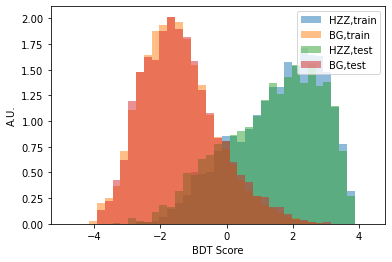

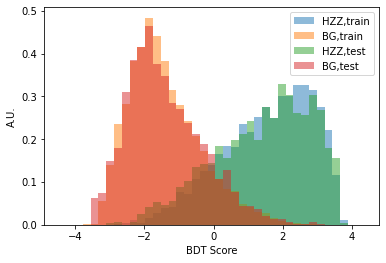

best result_polp80 sklo 2.2884215359711764 Sig/BG  1.9744706668425351 3.2247457669873256 S/(S+B) 0.37976312238036514 S/sqrt(S+B) 0.8659279100990814
polp 80 numbers done
best result_polm80 sklo 2.661042155692326 Sig/BG  7.698166899383068 12.126448615221307 S/(S+B) 0.38831355360773534 S/sqrt(S+B) 1.7289599604863268
3.3333333333333335 1.4285714285714286


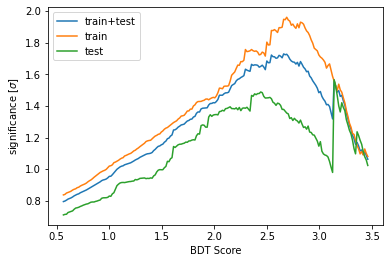

3.3333333333333335 1.4285714285714286


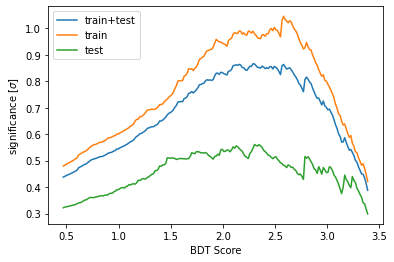

In [18]:
#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polp80_train_BG=sum_wpos_train_polp80/sum_wneg_train_polp80 
rescale_polp80_test_SIG=sum_wpos_train_polp80/sum_wpos_test_polp80
rescale_polp80_test_BG=sum_wpos_train_polp80/sum_wneg_test_polp80

ypred_polp80_test_skl_B=np.ma.masked_where(y_polp80_test==1,ypred_polp80_test_skl)
ypred_polp80_train_skl_B=np.ma.masked_where(y_polp80_train==1,ypred_polp80_train_skl)
ypred_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_polp80_test_skl)
ypred_polp80_train_skl_S=np.ma.masked_where(y_polp80_train==0,ypred_polp80_train_skl)

ypred_polm80_test_skl_B=np.ma.masked_where(y_polm80_test==1,ypred_polm80_test_skl)
ypred_polm80_train_skl_B=np.ma.masked_where(y_polm80_train==1,ypred_polm80_train_skl)
ypred_polm80_test_skl_S=np.ma.masked_where(y_polm80_test==0,ypred_polm80_test_skl)
ypred_polm80_train_skl_S=np.ma.masked_where(y_polm80_train==0,ypred_polm80_train_skl)

num_plot_polp80_min=1.2*min(np.min(ypred_polp80_train_skl_B),np.min(ypred_polp80_test_skl_B))
num_plot_polp80_max=1.2*max(np.max(ypred_polp80_train_skl_B),np.max(ypred_polp80_test_skl_B))

bins_polp80 = np.linspace(num_plot_polp80_min,num_plot_polp80_max,40)   

num_plot_polm80_min=1.2*min(np.min(ypred_polm80_train_skl_B),np.min(ypred_polm80_test_skl_B))
num_plot_polm80_max=1.2*max(np.max(ypred_polm80_train_skl_B),np.max(ypred_polm80_test_skl_B))

bins_polm80 = np.linspace(num_plot_polm80_min,num_plot_polm80_max,40) 

sum_wpos_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)
sum_wpos_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_polm80_train/sum_wneg_polm80_train 
rescale_polm80_test_SIG=sum_wpos_polm80_train/sum_wpos_polm80_test
rescale_polm80_test_BG=sum_wpos_polm80_train/sum_wneg_polm80_test

ypred_polp80_train_skl_B=ypred_polp80_train_skl_B.filled(2.*np.min(ypred_polp80_train_skl_B))
ypred_polp80_test_skl_B=ypred_polp80_test_skl_B.filled(2.*np.min(ypred_polp80_test_skl_B))
ypred_polp80_train_skl_S=ypred_polp80_train_skl_S.filled(2.*np.max(ypred_polp80_train_skl_S))
ypred_polp80_test_skl_S=ypred_polp80_test_skl_S.filled(2.*np.max(ypred_polp80_test_skl_S))

ypred_polm80_train_skl_B=ypred_polm80_train_skl_B.filled(2.*np.min(ypred_polm80_train_skl_B))
ypred_polm80_test_skl_B=ypred_polm80_test_skl_B.filled(2.*np.min(ypred_polm80_test_skl_B))
ypred_polm80_train_skl_S=ypred_polm80_train_skl_S.filled(2.*np.max(ypred_polm80_train_skl_S))
ypred_polm80_test_skl_S=ypred_polm80_test_skl_S.filled(2.*np.max(ypred_polm80_test_skl_S))

plt.figure(1)
hist_S_polm80_train_skl = plt.hist(ypred_polm80_train_skl_S, bins_polm80, alpha=0.5,weights=weight_polm80_array_train,label='HZZ,train')
hist_B_polm80_train_skl = plt.hist(ypred_polm80_train_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_train_BG*weight_polm80_array_train,label="BG,train")
hist_S_polm80_test_skl = plt.hist(ypred_polm80_test_skl_S, bins_polm80, alpha=0.5,weights=rescale_polm80_test_SIG*weight_polm80_array_test,label='HZZ,test')
hist_B_polm80_test_skl = plt.hist(ypred_polm80_test_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_test_BG*weight_polm80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.xlabel('BDT Score')    
plt.ylabel('A.U.')
plt.savefig("BDT_training_testing_polm80.pdf")
plt.show()

plt.figure(2)
hist_S_polp80_train_skl = plt.hist(ypred_polp80_train_skl_S, bins_polp80, alpha=0.5,weights=weight_polp80_array_train,label='HZZ,train')
hist_B_polp80_train_skl = plt.hist(ypred_polp80_train_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_train_BG*weight_polp80_array_train,label="BG,train")
hist_S_polp80_test_skl = plt.hist(ypred_polp80_test_skl_S, bins_polp80, alpha=0.5,weights=rescale_polp80_test_SIG*weight_polp80_array_test,label='HZZ,test')
hist_B_polp80_test_skl = plt.hist(ypred_polp80_test_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_test_BG*weight_polp80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.xlabel('BDT Score')
plt.ylabel('A.U.')
#plt.savefig("BDT_training_testing_polp80.pdf")
plt.show()

"""

num_plot_polp80_min=1.2*min(np.min(ypred_polp80_train_skl_B),np.min(ypred_polp80_test_skl_B))
num_plot_polm80_min=1.2*min(np.min(ypred_polm80_train_skl_B),np.min(ypred_polm80_test_skl_B))
  
bins_polp80 = np.linspace(num_plot_polp80_min,num_plot_polp80_max,50)    
bins_polm80 = np.linspace(num_plot_polm80_min,num_plot_polm80_max,50)  
    
#ypred_polp80_train_skl_B=ypred_polp80_train_skl_B.filled(2.*np.min(ypred_polp80_train_skl_B))
#ypred_polp80_test_skl_B=ypred_polp80_test_skl_B.filled(2.*np.min(ypred_polp80_train_skl_B))
print(ypred_polp80_train_skl_S)
#ypred_polp80_train_skl_S=ypred_polp80_train_skl_S.filled(2.*np.max(ypred_polp80_train_skl_S))
#ypred_polp80_test_skl_S=ypred_polp80_test_skl_S.filled(2.*np.max(ypred_polp80_test_skl_S))
#for i in range(len(ypred_polp80_train_skl_B)):
#    print("B/S",ypred_polp80_train_skl_B[i],ypred_polp80_train_skl_S[i])

#ypred_polm80_train_skl_B=ypred_polm80_train_skl_B.filled(2.*np.min(ypred_polm80_train_skl_B))
#ypred_polm80_test_skl_B=ypred_polm80_test_skl_B.filled(2.*np.min(ypred_polm80_train_skl_B))
#ypred_polm80_train_skl_S=ypred_polm80_train_skl_S.filled(2.*np.max(ypred_polm80_train_skl_S))
#ypred_polm80_test_skl_S=ypred_polm80_test_skl_S.filled(2.*np.max(ypred_polm80_train_skl_S))

rescale_polm80_train_BG=sum_wpos_train_polm80/sum_wneg_train_polm80 
rescale_polm80_test_SIG=sum_wpos_train_polm80/sum_wpos_test_polm80
rescale_polm80_test_BG=sum_wpos_train_polm80/sum_wneg_test_polm80

plt.figure(1)
hist_S_polm80_train_skl = plt.hist(ypred_polm80_train_skl_S, bins_polm80, alpha=0.5,weights=weight_polm80_array_train,label='HZZ,train')
hist_B_polm80_train_skl = plt.hist(ypred_polm80_train_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_train_BG*weight_polm80_array_train,label="BG,train")
hist_S_polm80_test_skl = plt.hist(ypred_polm80_test_skl_S, bins_polm80, alpha=0.5,weights=rescale_polm80_test_SIG*weight_polm80_array_test,label='HZZ,test')
hist_B_polm80_test_skl = plt.hist(ypred_polm80_test_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_test_BG*weight_polm80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.show()



print ('min/max B/S train/test',np.min(ypred_polp80_train_skl_B),np.max(ypred_polp80_train_skl_B),np.min(ypred_polp80_train_skl_S),np.max(ypred_polp80_train_skl_S),np.min(ypred_polp80_test_skl_B),np.max(ypred_polp80_test_skl_B),np.min(ypred_polp80_test_skl_S),np.max(ypred_polp80_test_skl_S))

#plt.figure(3)
#hist_S_polp80_train = plt.hist(ypred_polp80_train_skl_S, bins_polp80, alpha=0.5,weights=weight_polp80_array_train,label='HZZ,train')
##hist_B_polp80_train = plt.hist(ypred_polp80_train_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_train_BG*weight_polp80_array_train,label="BG,train")
#hist_S_polp80_test = plt.hist(ypred_polp80_test_skl_S, bins_polp80, alpha=0.5,weights=rescale_polp80_test_SIG*weight_polp80_array_test,label='HZZ,test')
#hist_B_polp80_test = plt.hist(ypred_polp80_test_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_test_BG*weight_polp80_array_test,label="BG,test")
#plt.show()
"""
count_sig_polp80_test_skl = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_test_skl=np.zeros(test_bins_BDT_polp80)
count_sig_polp80_train_skl = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_train_skl = np.zeros(test_bins_BDT_polp80)
count_sig_polp80_test = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_test=np.zeros(test_bins_BDT_polp80)
count_sig_polp80_train = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_train = np.zeros(test_bins_BDT_polp80)

count_sig_polm80_test_skl = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_test_skl=np.zeros(test_bins_BDT_polm80)
count_sig_polm80_train_skl = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_train_skl = np.zeros(test_bins_BDT_polm80)

max_sig_polm80_skl=0
max_sig_polm80_skl_j=-1
max_sig_polp80_skl=0
max_sig_polp80_skl_j=-1




for j in range (len(pred_lim_polp80)):
    for i in range(len(y_polp80_test)):
        if (sel_HHZ_polp80_test[i]==1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]):
            count_sig_polp80_test_skl[j]+=weight_polp80_array_test.item(i) 
        elif (sel_HHZ_polp80_test[i]!=1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]):
            count_BG_polp80_test_skl[j]+=weight_polp80_array_test.item(i) 
    for i in range(len(y_polp80_train)):
        if (sel_HHZ_polp80_train[i]==1 and ypred_polp80_train_skl[i]>pred_lim_polp80[j]):
            count_sig_polp80_train_skl[j]+=weight_polp80_array_train.item(i) 
        elif (sel_HHZ_polp80_train[i]!=1 and ypred_polp80_train_skl[i]>pred_lim_polp80[j]):
            count_BG_polp80_train_skl[j]+=weight_polp80_array_train.item(i) 
    #print("pred_lim",pred_lim_polp80[j],"all sig/test sig/train sig",(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/math.sqrt(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j]))
    if (count_sig_polp80_test_skl[j]+count_BG_polp80_test_skl[j])>0 and ((count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/math.sqrt(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j]) )>max_sig_polp80_skl :
        max_sig_polp80_skl=(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/math.sqrt(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j])
        max_sig_polp80_skl_j=j
print("best result_polp80 sklo",pred_lim_polp80[max_sig_polp80_skl_j],'Sig/BG ',count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j],count_BG_polp80_test_skl[max_sig_polp80_skl_j]+count_BG_polp80_train_skl[max_sig_polp80_skl_j],"S/(S+B)",(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j])/(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j]+count_BG_polp80_test_skl[max_sig_polp80_skl_j]+count_BG_polp80_train_skl[max_sig_polp80_skl_j]),"S/sqrt(S+B)",(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j])/math.sqrt(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j]+count_BG_polp80_test_skl[max_sig_polp80_skl_j]+count_BG_polp80_train_skl[max_sig_polp80_skl_j]))
print ("polp 80 numbers done")



for j in range (len(pred_lim_polm80)):
    for i in range(len(y_polm80_test)):
        if (sel_HHZ_polm80_test[i]==1 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]):
            count_sig_polm80_test_skl[j]+=weight_polm80_array_test.item(i) 
        elif (sel_HHZ_polm80_test[i]!=1 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]):
            count_BG_polm80_test_skl[j]+=weight_polm80_array_test.item(i)
    for i in range(len(y_polm80_train)):
        if (sel_HHZ_polm80_train[i]==1 and ypred_polm80_train_skl[i]>pred_lim_polm80[j]):
            count_sig_polm80_train_skl[j]+=weight_polm80_array_train.item(i) 
        elif (sel_HHZ_polm80_train[i]!=1 and ypred_polm80_train_skl[i]>pred_lim_polm80[j]):
            count_BG_polm80_train_skl[j]+=weight_polm80_array_train.item(i) 
    if ((count_sig_polm80_test_skl[j]+count_BG_polm80_test_skl[j])>0 and (((count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j])/math.sqrt(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polm80_train_skl[j]))>max_sig_polm80_skl)):
        max_sig_polm80_skl=(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j])/math.sqrt(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polm80_train_skl[j])
        max_sig_polm80_skl_j=j
        #print("in",j,"limit polm80 sklo new best value",pred_lim_polm80[max_sig_polm80_skl_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j],count_BG_polm80_test_skl[j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j],(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]),(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/math.sqrt(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]))
print("best result_polm80 sklo",pred_lim_polm80[max_sig_polm80_skl_j],"Sig/BG "
      ,count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]
      ,count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j],"S/(S+B)",
      (count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]),
      "S/sqrt(S+B)",(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/math.sqrt(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]))
        
#sig=S/sqrt(s+b)
f_test_polm80=1./test_size_polm80
f_train_polm80=1./(1.-test_size_polm80)
print(1./test_size_polm80,1./(1.-test_size_polm80))
sign_polm80_tot= np.divide(np.add(count_sig_polm80_test_skl,count_sig_polm80_train_skl),np.sqrt(np.add(np.add(count_sig_polm80_test_skl,count_sig_polm80_train_skl),np.add(count_BG_polm80_test_skl,count_BG_polm80_train_skl))))
sign_polm80_train= np.divide(f_train_polm80*count_sig_polm80_train_skl,np.sqrt(np.add(f_train_polm80*count_sig_polm80_train_skl,f_train_polm80*count_BG_polm80_train_skl)))
sign_polm80_test= np.divide(f_test_polm80*count_sig_polm80_test_skl,np.sqrt(np.add(f_test_polm80*count_sig_polm80_test_skl,f_test_polm80*count_BG_polm80_test_skl)))

plt.plot(pred_lim_polm80,sign_polm80_tot,label='train+test')
plt.plot(pred_lim_polm80,sign_polm80_train,label='train')
plt.plot(pred_lim_polm80,sign_polm80_test,label='test')
plt.legend(loc="upper left")
plt.xlabel('BDT Score')
plt.ylabel(r'significance [$\sigma$]')
#plt.savefig("BDT_training_testing_polp80.pdf")
plt.show()
#sig=S/sqrt(s+b)
f_test_polp80=1./test_size_polp80
f_train_polp80=1./(1.-test_size_polp80)
print(1./test_size_polp80,1./(1.-test_size_polp80))
sign_polp80_tot= np.divide(np.add(count_sig_polp80_test_skl,count_sig_polp80_train_skl),np.sqrt(np.add(np.add(count_sig_polp80_test_skl,count_sig_polp80_train_skl),np.add(count_BG_polp80_test_skl,count_BG_polp80_train_skl))))
sign_polp80_train= np.divide(f_train_polp80*count_sig_polp80_train_skl,np.sqrt(np.add(f_train_polp80*count_sig_polp80_train_skl,f_train_polp80*count_BG_polp80_train_skl)))
sign_polp80_test= np.divide(f_test_polp80*count_sig_polp80_test_skl,np.sqrt(np.add(f_test_polp80*count_sig_polp80_test_skl,f_test_polp80*count_BG_polp80_test_skl)))


plt.plot(pred_lim_polp80,sign_polp80_tot,label='train+test')
plt.plot(pred_lim_polp80,sign_polp80_train,label='train')
plt.plot(pred_lim_polp80,sign_polp80_test,label='test')
plt.legend(loc="upper left")
plt.xlabel('BDT Score')
plt.ylabel(r'significance [$\sigma$]')
#plt.savefig("BDT_training_testing_polp80.pdf")
plt.show()

#for j in range (len(pred_lim_polm80)):
#      print(j,"lim",pred_lim_polm80[j],"sig tot/train/test",sign_polm80_tot[j],sign_polm80_train[j],sign_polm80_test[j])

In [ ]:
"""
import matplotlib.pyplot as plt

sum_wpos_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)
sum_wpos_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_polm80_train/sum_wneg_polm80_train 
rescale_polm80_test_SIG=sum_wpos_polm80_train/sum_wpos_polm80_test
rescale_polm80_test_BG=sum_wpos_polm80_train/sum_wneg_polm80_test

modelfile_polm80 = '/Users/matthiasweber/jupytermacros/HHZModel_polm80.model'
bst_polm80 = xgb.Booster(model_file = modelfile_polm80)
ypred_polm80_test = bst_polm80.predict( xgmat_polm80_test )
ypred_polm80_train = bst_polm80.predict( xgmat_polm80_train )
label_polm80 = xgmat_polm80_train.get_label()

ypred_polm80_test_B=np.ma.masked_where(y_polm80_test==1,ypred_polm80_test)
ypred_polm80_test_S=np.ma.masked_where(y_polm80_test==0,ypred_polm80_test)
ypred_polm80_train_B=np.ma.masked_where(y_polm80_train==1,ypred_polm80_train)
ypred_polm80_train_S=np.ma.masked_where(y_polm80_train==0,ypred_polm80_train)
print ('min/max B/S train/test',np.min(ypred_polm80_train_B),np.max(ypred_polm80_train_B),np.min(ypred_polm80_train_S),np.max(ypred_polm80_train_S),np.min(ypred_polm80_test_B),np.max(ypred_polm80_test_B),np.min(ypred_polm80_test_S),np.max(ypred_polm80_test_S))

bins_polm80 = np.linspace(-1.2*np.min(ypred_polm80_train_B),1.2*np.max(ypred_polm80_train_S),50)
ypred_polm80_train_B=ypred_polm80_train_B.filled(-2.*np.min(ypred_polm80_train_B))
ypred_polm80_train_S=ypred_polm80_train_S.filled(2.*np.max(ypred_polm80_train_S))
ypred_polm80_test_B=ypred_polm80_test_B.filled(-2.*np.min(ypred_polm80_train_B))
ypred_polm80_test_S=ypred_polm80_test_S.filled(2.*np.max(ypred_polm80_train_S))
hist_S_polm80_train = plt.hist(ypred_polm80_train_S, bins_polm80, alpha=0.5,weights=weight_polm80_array_train,label='HZZ,train')
hist_B_polm80_train = plt.hist(ypred_polm80_train_B, bins_polm80, alpha=0.5,weights=rescale_polm80_train_BG*weight_polm80_array_train,label="BG,train")
hist_S_polm80_test = plt.hist(ypred_polm80_test_S, bins_polm80, alpha=0.5,weights=rescale_polm80_test_SIG*weight_polm80_array_test,label='HZZ,test')
hist_B_polm80_test = plt.hist(ypred_polm80_test_B, bins_polm80, alpha=0.5,weights=rescale_polm80_test_BG*weight_polm80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.show()
count_sig_polm80_test = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_test_skl=np.zeros(test_bins_BDT_polm80)
count_sig_polm80_train = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_train_skl = np.zeros(test_bins_BDT_polm80)
"""
"""
for i in range(len(ypred_polm80_test)):
    if (y_polm80_test[i]==1):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_test[i]>pred_lim_polm80[j]):
                count_sig_polm80_test[j]=count_sig_polm80_test[j]+weight_polm80_array_test.item(i)
    else:
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_test[i]>pred_lim_polm80[j]):
                count_BG_polm80_test_skl[j]=count_BG_polm80_test_skl[j]+weight_polm80_array_test.item(i)
for i in range(len(ypred_polm80_train)):
    if (y_polm80_train[i]==1):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_train[i]>pred_lim_polm80[j]):
                count_sig_polm80_train[j]=count_sig_polm80_train[j]+weight_polm80_array_train.item(i)
    else:
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_train[i]>pred_lim_polm80[j]):
                count_BG_polm80_train_skl[j]=count_BG_polm80_train_skl[j]+weight_polm80_array_train.item(i)
max_sig_polm80=0
max_sig_polm80_j=-1
for j in range (len(pred_lim_polm80)):
    if (count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j])>0 and ((count_sig_polm80_train[j]+count_sig_polm80_test[j])/math.sqrt(count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]))>max_sig_polm80:
        max_sig_polm80=(count_sig_polm80_train[j]+count_sig_polm80_test[j])/math.sqrt(count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j])
        max_sig_polm80_j=j
"""
print("best result_polm80",pred_lim_polm80[max_sig_polm80_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j],count_BG_polm80_train_skl[max_sig_polm80_j]+count_BG_polm80_test_skl[max_sig_polm80_j],(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j])/(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j]+count_BG_polm80_train_skl[max_sig_polm80_j]+count_BG_polm80_test_skl[max_sig_polm80_j]),(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j])/math.sqrt(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j]+count_BG_polm80_train_skl[max_sig_polm80_j]+count_BG_polm80_test_skl[max_sig_polm80_j]))

In [19]:
file_polp80_hhz_signal_nopreselect=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC10_NJets6_finalAnalysis/polp80/NTuplesAnalysis/ntuple_HHZ_hhqq_14365_polp80_3TeV_wO_CLIC_o3_v14.root")
tree_polp80_hhz_signal_nopreselect = file_polp80_hhz_signal_nopreselect["MVATrainingVariables"]

df_polp80_HHZ_nopreselect=tree_polp80_hhz_signal_nopreselect.pandas.df(["weight"])
total_events_polp80_nopreselect=df_polp80_HHZ_nopreselect['weight'].sum()
print("total weight of polp80", total_events_polp80_nopreselect)

file_polm80_hhz_signal_nopreselect=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC10_NJets6_finalAnalysis/polm80/NTuplesAnalysis/ntuple_HHZ_hhqq_14364_polm80_3TeV_wO_CLIC_o3_v14.root")
tree_polm80_hhz_signal_nopreselect = file_polm80_hhz_signal_nopreselect["MVATrainingVariables"]

df_polm80_HHZ_nopreselect=tree_polm80_hhz_signal_nopreselect.pandas.df(["weight"])
total_events_polm80_nopreselect=df_polm80_HHZ_nopreselect['weight'].sum()
print("total weight of polm80", total_events_polm80_nopreselect)

total weight of polp80 11.713964
total weight of polm80 68.76102


best result_polp80 2.156493198931517 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  2.6823154862504452 4.243751112109749 0.38727832719447236 1.0192166867368784
best result_polm80 2.5445214494388906 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  10.10166697204113 17.31933168042451 0.3683916512330527 1.9290852174117719
size of plot arrays 40000
40000
at end of filling, efficiency [0.36395072 0.36376445 0.36358853 ... 0.01861534 0.01836699 0.01808759]
at end of filling, significance [1.21194473 1.21230418 1.21266621 ... 1.21078008 1.20213056 1.19252682]
at end of filling, efficiency sorted [0.01808759 0.01836699 0.01861534 ... 0.36358853 0.36376445 0.36395072]
at end of filling, significance sorted [1.19252682 1.20213056 1.21078008 ... 1.21266621 1.21230418 1.21194473]
best result_polm80_polp80 combined 2.5445214494388906 2.1271757907004814 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  12.840610043844208 21.803635786636733 0.370641927282097 2.181574764734931
all hhz/all sig/hzqq/qq/qqqq/qqqqqq/WWH/ZZH 12.840610043844208 11.03406245

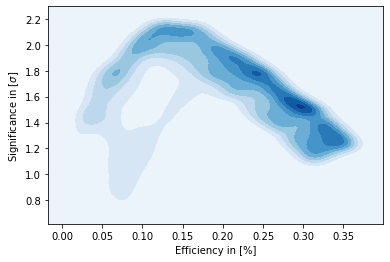

In [20]:
import seaborn as sns

file_polp80_hhz_signal_AllEvents=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14365_AllEvents.root")
tree_polp80_hhz_signal_AllEvents = file_polp80_hhz_signal_AllEvents["MVATrainingVariables"]

df_polp80_HHZ_AllEvents=tree_polp80_hhz_signal_AllEvents.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                                    "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                                    "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                                    "LTag_sum_all","jet*_E","jet*_theta"])
data_polp80_HHZ_AllEvents=df_polp80_HHZ_AllEvents.iloc[:,1:]
weight_polp80_HHZ_AllEvents = df_polp80_HHZ_AllEvents.iloc[:,0]
weight_polp80_array_HHZ_AllEvents=np.asarray(weight_polp80_HHZ_AllEvents)
xgmat_polp80_HHZ_AllEvents = xgb.DMatrix( data_polp80_HHZ_AllEvents, label=y_polp80_train, missing = -999.0, weight=weight_polp80_HHZ_AllEvents )
bst_polp80 = xgb.Booster()
bst_polp80.load_model(modelfile_polp80_sklearn)
ypred_polp80_HHZ_AllEvents= bst_polp80.predict( xgmat_polp80_HHZ_AllEvents )
#print(ypred_polp80_HHZ_AllEvents.shape,ypred_polp80_test_skl.shape,ypred_polp80_train_skl.shape)
#print(ypred_polm80_HHZ_AllEvents.shape,ypred_polm80_test_skl.shape,ypred_polm80_train_skl.shape)
count_sig_polp80_HHZ_AllEvents = np.zeros(test_bins_BDT_polp80)
for i in range(len(ypred_polp80_HHZ_AllEvents)):
        for j in range (len(pred_lim_polp80)):
            if (ypred_polp80_HHZ_AllEvents[i]>pred_lim_polp80[j]):
                count_sig_polp80_HHZ_AllEvents[j]+=weight_polp80_array_HHZ_AllEvents.item(i)
max_sig_polp80_HHZ_All=0
max_sig_polp80_HHZ_All_j=-1
for j in range (len(pred_lim_polp80)):
    if(count_sig_polp80_HHZ_AllEvents[j]<(count_sig_polp80_train_skl[j]+count_sig_polp80_test_skl[j])):
        print("all should be more than bbbbqq events",count_sig_polp80_HHZ_AllEvents[j],count_sig_polp80_train_skl[j]+count_sig_polp80_test_skl[j])
    if (count_sig_polp80_HHZ_AllEvents[j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[j]+count_BG_polp80_train_skl[j]+count_BG_polp80_test_skl[j]))>max_sig_polp80_HHZ_All:
        max_sig_polp80_HHZ_All=count_sig_polp80_HHZ_AllEvents[j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[j]+count_BG_polp80_train_skl[j]+count_BG_polp80_test_skl[j])
        max_sig_polp80_HHZ_All_j=j
print("best result_polp80",pred_lim_polp80[max_sig_polp80_HHZ_All_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j],count_BG_polp80_train_skl[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test_skl[max_sig_polp80_HHZ_All_j],count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]/(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test_skl[max_sig_polp80_HHZ_All_j]),count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test_skl[max_sig_polp80_HHZ_All_j]))
#now do the negativ results
file_polm80_hhz_signal_AllEvents=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14364_AllEvents.root")
tree_polm80_hhz_signal_AllEvents = file_polm80_hhz_signal_AllEvents["MVATrainingVariables"]

df_polm80_HHZ_AllEvents=tree_polm80_hhz_signal_AllEvents.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                                    "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                                    "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                                    "LTag_sum_all","jet*_E","jet*_theta"])
data_polm80_HHZ_AllEvents=df_polm80_HHZ_AllEvents.iloc[:,1:]
weight_polm80_HHZ_AllEvents = df_polm80_HHZ_AllEvents.iloc[:,0]
weight_polm80_array_HHZ_AllEvents=np.asarray(weight_polm80_HHZ_AllEvents)
xgmat_polm80_HHZ_AllEvents = xgb.DMatrix( data_polm80_HHZ_AllEvents, label=y_polm80_train, missing = -999.0, weight=weight_polm80_HHZ_AllEvents )
bst_polm80 = xgb.Booster()
bst_polm80.load_model(modelfile_polm80_sklearn)
ypred_polm80_HHZ_AllEvents= bst_polm80.predict( xgmat_polm80_HHZ_AllEvents )
count_sig_polm80_HHZ_AllEvents = np.zeros(test_bins_BDT_polm80)
for i in range(len(ypred_polm80_HHZ_AllEvents)):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_HHZ_AllEvents[i]>pred_lim_polm80[j]):
                count_sig_polm80_HHZ_AllEvents[j]+=weight_polm80_array_HHZ_AllEvents.item(i)
max_sig_polm80_HHZ_All=0
max_sig_polm80_HHZ_All_j=-1
for j in range (len(pred_lim_polm80)):
    if(count_sig_polm80_HHZ_AllEvents[j]<(count_sig_polm80_train_skl[j]+count_sig_polm80_test_skl[j])):
        print("all polm80 should be more than bbbbqq events",count_sig_polm80_HHZ_AllEvents[j],count_sig_polm80_train_skl[j]+count_sig_polm80_test_skl[j])
    if (count_sig_polm80_HHZ_AllEvents[j]/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]))>max_sig_polm80_HHZ_All:
        max_sig_polm80_HHZ_All=(count_sig_polm80_HHZ_AllEvents[j])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j])
        max_sig_polm80_HHZ_All_j=j
print("best result_polm80",pred_lim_polm80[max_sig_polm80_HHZ_All_j],
      'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j],count_BG_polm80_train_skl[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_HHZ_All_j],
      count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]/(count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]+count_BG_polm80_train_skl[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_HHZ_All_j]),
      count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]/math.sqrt(count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]+count_BG_polm80_train_skl[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_HHZ_All_j]))

max_sig_polm80_polp80_HHZ_All=0
max_sig_polm80_comb_HHZ_All_j=-1
max_sig_polp80_comb_HHZ_All_i=-1

size_np_arrays=len(pred_lim_polm80)*len(pred_lim_polp80)
print("size of plot arrays",size_np_arrays)
significance_polp80_polm80_combined = np.zeros(size_np_arrays)
efficiency_polp80_polm80_combined = np.zeros(size_np_arrays)

index_array_counter=0;

for j in range(len(pred_lim_polm80)):
    #print("all, sig polm80 ",j,count_sig_polm80_HHZ_AllEvents[j],count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j])
    for i in range(len(pred_lim_polp80)):
        if (count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])>0:
            #else values are set to 0 per default
            efficiency_polp80_polm80_combined[index_array_counter]=(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j]+count_sig_polp80_test_skl[i]+count_sig_polp80_train_skl[i])/(total_events_polm80_nopreselect+total_events_polp80_nopreselect)
            significance_polp80_polm80_combined[index_array_counter]=(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polp80_train_skl[i]+count_BG_polp80_test_skl[i])
        index_array_counter+=1    
        #print("all, sig polp80 ",i,count_sig_polp80_HHZ_AllEvents[i],count_sig_polp80_test_skl[i]+count_sig_polp80_train_skl[i])
        if (count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])>0 and ((count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polp80_train_skl[i]+count_BG_polp80_test_skl[i]))>max_sig_polm80_polp80_HHZ_All:
            max_sig_polm80_polp80_HHZ_All=(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polp80_train_skl[i]+count_BG_polp80_test_skl[i])
            max_sig_polm80_comb_HHZ_All_j=j
            max_sig_polp80_comb_HHZ_All_i=i  
print(index_array_counter)

print("at end of filling, efficiency",efficiency_polp80_polm80_combined)
print("at end of filling, significance",significance_polp80_polm80_combined)

eff_ind_ordered = efficiency_polp80_polm80_combined.argsort()
sorted_efficiency_polp80_polm80_combined = efficiency_polp80_polm80_combined[eff_ind_ordered[::]]
sorted_significance_polp80_polm80_combined = significance_polp80_polm80_combined[eff_ind_ordered[::]]

print("at end of filling, efficiency sorted",sorted_efficiency_polp80_polm80_combined)
print("at end of filling, significance sorted",sorted_significance_polp80_polm80_combined)

plt.scatter(sorted_efficiency_polp80_polm80_combined, sorted_significance_polp80_polm80_combined)


sbn_fig=sns.kdeplot(sorted_efficiency_polp80_polm80_combined, sorted_significance_polp80_polm80_combined, cmap="Blues", shade=True, shade_lowest=True, )

plt.xlabel('Efficiency in [%]')
plt.ylabel('Significance in [$\\sigma$]')
plt.savefig("Efficiency_vs_Significance_polm80_and_polp80.pdf")
            
count_tot_hhz_polp80_skl=0
count_tot_hzqq_polp80_skl=0
count_tot_ee_qq_polp80_skl=0
count_tot_ee_qqqq_polp80_skl=0
count_tot_ee_qqqqqq_polp80_skl=0
count_tot_WWH_qqqqH_polp80_skl=0
count_tot_ZZH_qqqqH_polp80_skl=0
count_tot_hhz_polm80_skl=0
count_tot_hzqq_polm80_skl=0
count_tot_ee_qq_polm80_skl=0
count_tot_ee_qqqq_polm80_skl=0
count_tot_ee_qqqqqq_polm80_skl=0
count_tot_WWH_qqqqH_polm80_skl=0
count_tot_ZZH_qqqqH_polm80_skl=0

for i1 in range(len(y_polm80_test)):
    if sel_HHZ_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hhz_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_hzqq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hzqq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ee_qq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ee_qqqq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ee_qqqqqq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqqqq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_WWH_qqqqH_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_WWH_qqqqH_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ZZH_qqqqH_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ZZH_qqqqH_polm80_skl+=weight_polm80_array_test.item(i1) 
for i1 in range(len(y_polm80_train)):
    if sel_HHZ_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hhz_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_hzqq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hzqq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ee_qq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ee_qqqq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ee_qqqqqq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqqqq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_WWH_qqqqH_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_WWH_qqqqH_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ZZH_qqqqH_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ZZH_qqqqH_polm80_skl+=weight_polm80_array_train.item(i1) 
for i1 in range(len(y_polp80_test)):
    if sel_HHZ_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hhz_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_hzqq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hzqq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ee_qq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ee_qqqq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ee_qqqqqq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqqqq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_WWH_qqqqH_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_WWH_qqqqH_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ZZH_qqqqH_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ZZH_qqqqH_polp80_skl+=weight_polp80_array_test.item(i1) 
for i1 in range(len(y_polp80_train)):
    if sel_HHZ_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hhz_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_hzqq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hzqq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ee_qq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ee_qqqq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ee_qqqqqq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqqqq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_WWH_qqqqH_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_WWH_qqqqH_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ZZH_qqqqH_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ZZH_qqqqH_polp80_skl+=weight_polp80_array_train.item(i1)       
            
print("best result_polm80_polp80 combined",pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j],pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i],      
      'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j],count_BG_polp80_train_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train_skl[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_comb_HHZ_All_j],
      (count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j])/(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train_skl[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_comb_HHZ_All_j]),
      (count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j])/math.sqrt(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train_skl[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_comb_HHZ_All_j]))
print("all hhz/all sig/hzqq/qq/qqqq/qqqqqq/WWH/ZZH",count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j],count_tot_hhz_polp80_skl+count_tot_hhz_polm80_skl,count_tot_hzqq_polp80_skl+count_tot_hzqq_polm80_skl,count_tot_ee_qq_polp80_skl+count_tot_ee_qq_polm80_skl,
     count_tot_ee_qqqq_polp80_skl+count_tot_ee_qqqq_polm80_skl,count_tot_ee_qqqqqq_polp80_skl+count_tot_ee_qqqqqq_polm80_skl,
     count_tot_WWH_qqqqH_polp80_skl+count_tot_WWH_qqqqH_polm80_skl,count_tot_ZZH_qqqqH_polp80_skl+count_tot_ZZH_qqqqH_polm80_skl)
